# 1.Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

# 2.Reading dataset

In [2]:
data=pd.read_csv('cardio_train1.csv',sep=";")
data.shape

(70000, 13)

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 3.Data analysis

## Checking basic details of the dataset

In [4]:
data.shape

(70000, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### The columns age ,height,weight,ap_hi,ap_lo contains outliers.

# 4.Data preprocessing

## 4.1. checking for missing values

In [7]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### There are no missing values in the dataset

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Age is given in days. Transforming it into years for better understanding and checking relation with the target variable

In [10]:
data['age']=np.round(data['age']/365.25,decimals=1)

In [11]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.2,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.8,1,156,56.0,100,60,1,1,0,0,0,0


### The id attribute is just the patient id, and it will not contribute to our model, so drop id attribute

In [12]:
data.drop('id',axis=1,inplace=True)

## 4.2. Detecting and removing outliers 

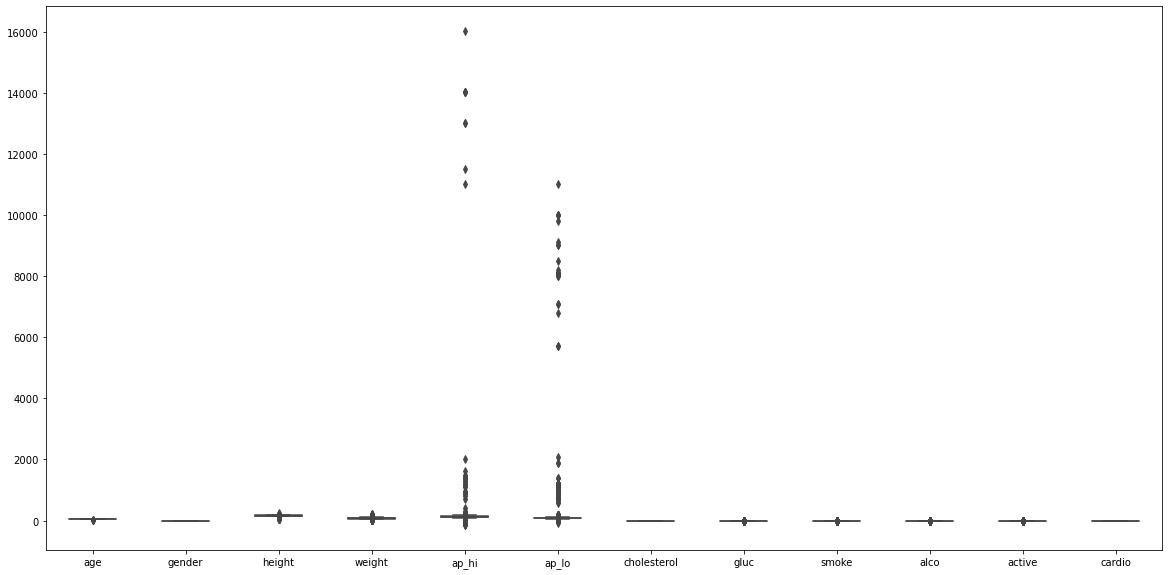

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,width= 0.5)

Text(0.5, 0, 'ap_lo')

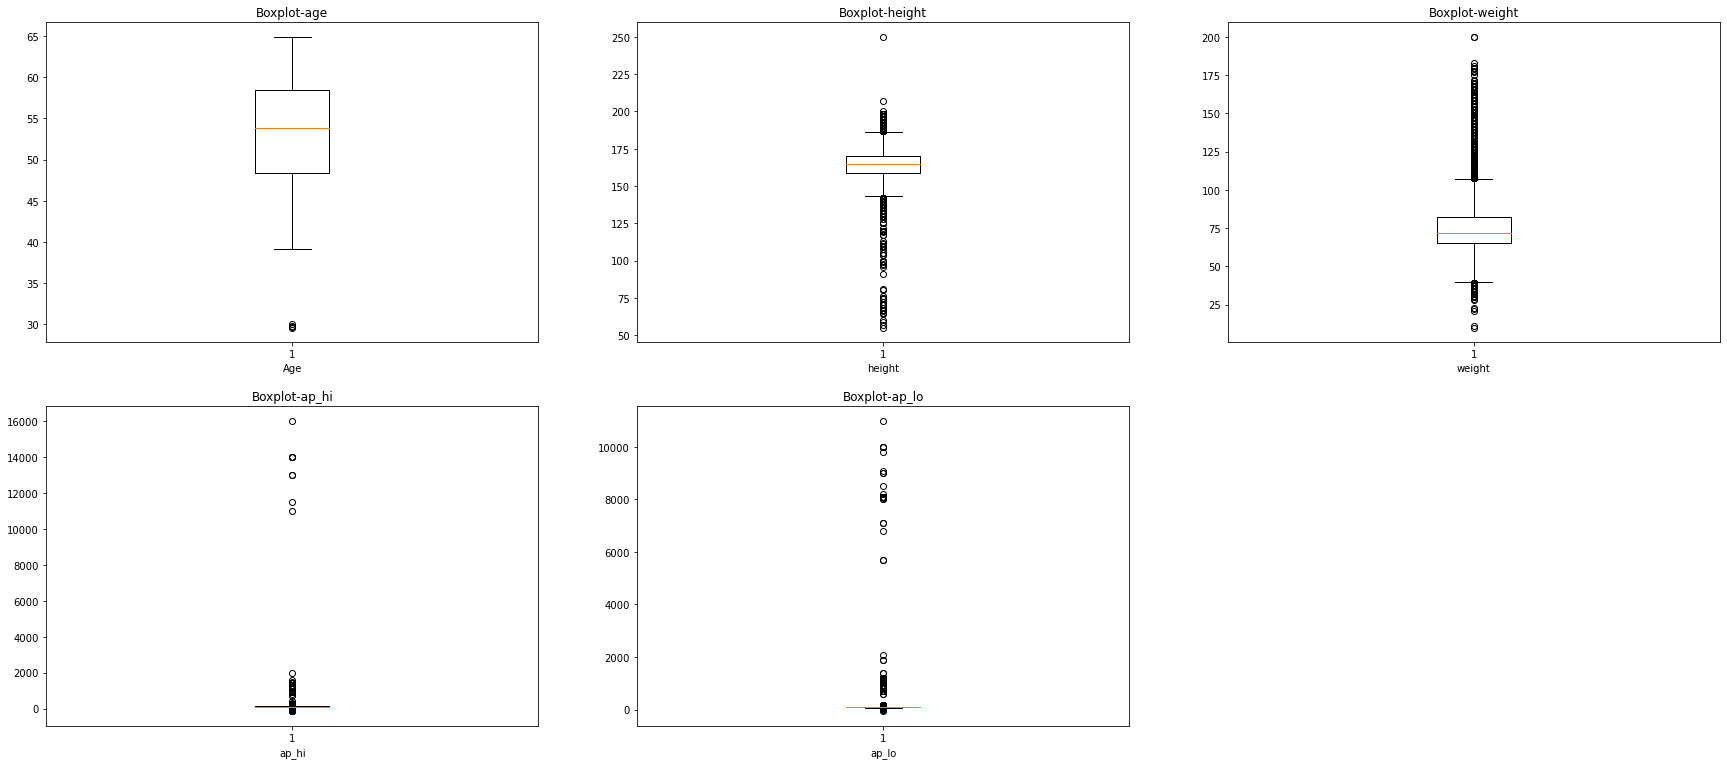

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plt.title('Boxplot-age')
plt.boxplot(data['age'])
plt.xlabel('Age')


plt.subplot(3,3,2)
plt.boxplot(data['height'])
plt.title('Boxplot-height')
plt.xlabel('height')
plt.subplot(3,3,3)
plt.boxplot(data['weight'])
plt.title('Boxplot-weight')
plt.xlabel('weight')
plt.subplot(3,3,4)
plt.boxplot(data['ap_hi'])
plt.title('Boxplot-ap_hi')
plt.xlabel('ap_hi')
plt.subplot(3,3,5)
plt.boxplot(data['ap_lo'])
plt.title('Boxplot-ap_lo')
plt.xlabel('ap_lo')




### outliers are present in age, height,weight,ap_hi,ap_lo attributes

## removing outliers in age

In [15]:
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')

In [16]:
print(Q1,Q2,Q3)

48.4 53.9 58.4


In [17]:
IQR=Q3-Q1
print(IQR)

10.0


In [18]:
lowerlimit=Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)

In [19]:
print(lowerlimit)
print(upperlimit)

33.4
73.4


In [20]:
outlier=[]
for x in data['age']:
    if((x>upperlimit) or (x<lowerlimit)):
        outlier.append(x)

In [21]:
ind=(data['age']>upperlimit)|(data['age']<lowerlimit)
data.loc[ind].index

Int64Index([6219, 22343, 30666, 55905], dtype='int64')

In [22]:
data.drop([6219, 22343, 30666, 55905],inplace=True)

## removing outliers in height

In [23]:
Q1=np.percentile(data['height'],25,interpolation='midpoint')
Q2=np.percentile(data['height'],50,interpolation='midpoint')
Q3=np.percentile(data['height'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
IQR=Q3-Q1
print(IQR)
lowerlimit=Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)
outlier=[]
for x in data['height']:
    if((x>upperlimit) or (x<lowerlimit)):
        outlier.append(x)
ind=(data['height']>upperlimit)|(data['height']<lowerlimit)
np.array(data.loc[ind].index)


159.0 165.0 170.0
11.0


array([   62,    76,   224,   249,   781,  1027,  1048,  1117,  1419,
        2160,  2203,  2412,  2463,  2663,  2680,  2883,  2944,  3132,
        3208,  3212,  3237,  3401,  3420,  3621,  3629,  3735,  3752,
        3907,  4212,  4481,  4826,  4911,  5001,  5010,  5057,  5104,
        5262,  5326,  5471,  5548,  5587,  5623,  5751,  5774,  5798,
        5955,  6055,  6153,  6303,  6344,  6486,  6559,  6603,  6730,
        6821,  6851,  6997,  7058,  7116,  7263,  7305,  7598,  8171,
        8525,  8677,  8760,  8897,  8902,  9131,  9284,  9461,  9603,
        9776,  9784, 10095, 10116, 10567, 10870, 11025, 11183, 11230,
       11448, 11477, 11708, 11904, 12007, 12015, 12171, 12435, 12733,
       12770, 12864, 12940, 12980, 13029, 13160, 13195, 13265, 13335,
       13448, 13652, 13870, 13952, 14073, 14291, 14323, 14410, 14555,
       14720, 14926, 15021, 15167, 15177, 15366, 15553, 15621, 15669,
       16011, 16020, 16225, 16677, 16699, 16809, 16935, 17074, 17277,
       17316, 17641,

In [24]:
data.drop([62,    76,   224,   249,   781,  1027,  1048,  1117,  1419,
        2160,  2203,  2412,  2463,  2663,  2680,  2883,  2944,  3132,
        3208,  3212,  3237,  3401,  3420,  3621,  3629,  3735,  3752,
        3907,  4212,  4481,  4826,  4911,  5001,  5010,  5057,  5104,
        5262,  5326,  5471,  5548,  5587,  5623,  5751,  5774,  5798,
        5955,  6055,  6153,  6303,  6344,  6486,  6559,  6603,  6730,
        6821,  6851,  6997,  7058,  7116,  7263,  7305,  7598,  8171,
        8525,  8677,  8760,  8897,  8902,  9131,  9284,  9461,  9603,
        9776,  9784, 10095, 10116, 10567, 10870, 11025, 11183, 11230,
       11448, 11477, 11708, 11904, 12007, 12015, 12171, 12435, 12733,
       12770, 12864, 12940, 12980, 13029, 13160, 13195, 13265, 13335,
       13448, 13652, 13870, 13952, 14073, 14291, 14323, 14410, 14555,
       14720, 14926, 15021, 15167, 15177, 15366, 15553, 15621, 15669,
       16011, 16020, 16225, 16677, 16699, 16809, 16935, 17074, 17277,
       17316, 17641, 17845, 17922, 17948, 17985, 17988, 18031, 18062,
       18092, 18372, 18752, 19177, 19421, 19434, 19672, 20028, 20072,
       20146, 20225, 20368, 20661, 20676, 21044, 21628, 21684, 21821,
       22239, 22253, 22254, 22523, 22542, 22589, 22673, 22723, 22772,
       22818, 22838, 22903, 23024, 23113, 23314, 23383, 23638, 23695,
       23719, 23773, 23777, 23852, 23913, 24006, 24268, 24696, 24725,
       24829, 24919, 24979, 25036, 25058, 25168, 25175, 25352, 26009,
       26108, 26420, 26608, 26665, 26752, 26931, 27120, 27185, 27384,
       27603, 27611, 27812, 27840, 28024, 28099, 28276, 28448, 28513,
       28737, 28742, 28817, 28897, 28975, 28993, 29087, 29145, 29157,
       29299, 29515, 29567, 29735, 29740, 29782, 29894, 30127, 30238,
       30279, 30281, 30293, 30327, 30341, 30546, 30670, 30702, 30799,
       30907, 31042, 31142, 31356, 31420, 31588, 31657, 31729, 31867,
       31903, 31904, 31918, 32098, 32128, 32274, 32459, 32585, 32589,
       32628, 32795, 32879, 32896, 33327, 33430, 33504, 33534, 33607,
       33849, 33883, 34028, 34083, 34112, 34165, 34169, 34241, 34276,
       34278, 34288, 34364, 34576, 34860, 35080, 35224, 35433, 35444,
       35774, 35793, 35799, 35984, 36484, 36522, 36642, 36727, 36753,
       36820, 37114, 37347, 37388, 37525, 37620, 37772, 38200, 38241,
       38330, 38360, 38410, 38813, 38866, 38938, 39079, 39098, 39281,
       39351, 39543, 39578, 39684, 39803, 39962, 40090, 40326, 40732,
       40965, 41203, 41268, 41394, 41478, 41584, 41807, 41901, 42087,
       42369, 42592, 42661, 43623, 43759, 43997, 44163, 44217, 44388,
       44447, 44490, 44746, 44798, 44824, 44999, 45091, 45183, 45321,
       45358, 45378, 45398, 46031, 46043, 46089, 46173, 46203, 46233,
       46319, 46349, 46374, 46404, 46539, 46572, 46574, 46750, 47298,
       47299, 47352, 47925, 47961, 48234, 49079, 49320, 49596, 49681,
       49693, 49819, 50136, 50212, 50399, 50617, 50789, 50857, 51043,
       51093, 51108, 51361, 51459, 51837, 51849, 51909, 51913, 52041,
       52742, 52758, 52962, 53119, 53224, 53344, 53433, 54017, 54289,
       54500, 54688, 54918, 54925, 55092, 55148, 55247, 55387, 55935,
       55942, 55961, 56022, 56051, 56123, 56135, 56145, 56400, 56518,
       56635, 56651, 56669, 56778, 56867, 56925, 56956, 57081, 57369,
       57435, 57529, 57574, 57832, 57945, 57965, 57976, 58477, 58581,
       58717, 58868, 59265, 59372, 59397, 59437, 59453, 59457, 59522,
       59576, 59620, 59625, 59738, 59854, 59957, 59960, 59972, 59977,
       60191, 60377, 60402, 60674, 60691, 60838, 60912, 61026, 61060,
       61232, 61362, 61453, 61602, 61753, 61801, 62176, 62418, 62753,
       63130, 63154, 63697, 63739, 63751, 63871, 64115, 64192, 64242,
       64454, 64526, 64562, 64582, 64645, 64769, 64787, 64802, 65059,
       65254, 65297, 65302, 65966, 66023, 66090, 66145, 66235, 66479,
       66643, 66944, 66965, 67062, 67172, 67317, 67329, 67339, 67396,
       67435, 67866, 67972, 68325, 68450, 68956, 69052, 69124, 69216,
       69291, 69430, 69475, 69589, 69784, 69873],inplace=True)

## removing outliers in weight

In [25]:
Q1=np.percentile(data['weight'],25,interpolation='midpoint')
Q2=np.percentile(data['weight'],50,interpolation='midpoint')
Q3=np.percentile(data['weight'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
IQR=Q3-Q1
print(IQR)
lowerlimit=Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)
outlier=[]
for x in data['weight']:
    if((x>upperlimit) or (x<lowerlimit)):
        outlier.append(x)
ind=(data['weight']>upperlimit)|(data['weight']<lowerlimit)

np.set_printoptions(threshold=np.inf)
np.array(data.loc[ind].index)


65.0 72.0 82.0
17.0


array([   15,    83,   196,   267,   286,   338,   389,   390,   393,
         435,   446,   496,   543,   591,   628,   697,   738,   740,
         751,   786,   794,   838,   851,   854,   956,   990,   992,
        1025,  1049,  1174,  1186,  1197,  1203,  1224,  1230,  1265,
        1270,  1276,  1379,  1399,  1417,  1481,  1598,  1601,  1626,
        1676,  1702,  1710,  1740,  1768,  1842,  1884,  1916,  1926,
        1935,  1968,  2030,  2142,  2165,  2198,  2229,  2230,  2251,
        2337,  2340,  2363,  2365,  2368,  2376,  2406,  2411,  2441,
        2458,  2482,  2513,  2578,  2605,  2859,  2867,  2934,  2953,
        2968,  3007,  3071,  3093,  3159,  3206,  3210,  3217,  3244,
        3252,  3313,  3315,  3344,  3351,  3413,  3446,  3457,  3494,
        3591,  3661,  3668,  3805,  3823,  3836,  3896,  3903,  4004,
        4040,  4050,  4063,  4075,  4151,  4187,  4246,  4319,  4325,
        4345,  4441,  4466,  4503,  4571,  4573,  4606,  4732,  4743,
        4828,  4903,

In [26]:
data.drop([ 15,    83,   196,   267,   286,   338,   389,   390,   393,
         435,   446,   496,   543,   591,   628,   697,   738,   740,
         751,   786,   794,   838,   851,   854,   956,   990,   992,
        1025,  1049,  1174,  1186,  1197,  1203,  1224,  1230,  1265,
        1270,  1276,  1379,  1399,  1417,  1481,  1598,  1601,  1626,
        1676,  1702,  1710,  1740,  1768,  1842,  1884,  1916,  1926,
        1935,  1968,  2030,  2142,  2165,  2198,  2229,  2230,  2251,
        2337,  2340,  2363,  2365,  2368,  2376,  2406,  2411,  2441,
        2458,  2482,  2513,  2578,  2605,  2859,  2867,  2934,  2953,
        2968,  3007,  3071,  3093,  3159,  3206,  3210,  3217,  3244,
        3252,  3313,  3315,  3344,  3351,  3413,  3446,  3457,  3494,
        3591,  3661,  3668,  3805,  3823,  3836,  3896,  3903,  4004,
        4040,  4050,  4063,  4075,  4151,  4187,  4246,  4319,  4325,
        4345,  4441,  4466,  4503,  4571,  4573,  4606,  4732,  4743,
        4828,  4903,  4944,  4956,  5059,  5119,  5191,  5221,  5240,
        5288,  5424,  5436,  5446,  5483,  5566,  5586,  5656,  5668,
        5681,  5765,  5792,  5794,  5823,  5902,  5930,  5943,  5977,
        5992,  6003,  6052,  6111,  6141,  6422,  6457,  6467,  6470,
        6554,  6622,  6738,  6777,  6810,  6850,  7081,  7111,  7138,
        7195,  7214,  7237,  7270,  7278,  7352,  7421,  7475,  7526,
        7577,  7636,  7659,  7932,  7951,  7981,  8017,  8029,  8166,
        8167,  8200,  8214,  8306,  8369,  8423,  8425,  8452,  8487,
        8513,  8593,  8649,  8671,  8696,  8730,  8780,  8801,  8826,
        8827,  8830,  8867,  8920,  8978,  9065,  9074,  9104,  9130,
        9214,  9273,  9339,  9354,  9401,  9411,  9438,  9529,  9563,
        9573,  9594,  9607,  9644,  9727,  9777,  9866,  9895,  9962,
        9983, 10013, 10030, 10100, 10216, 10227, 10386, 10392, 10394,
       10447, 10483, 10515, 10537, 10601, 10627, 10637, 10641, 10652,
       10661, 10674, 10694, 10719, 10741, 10856, 10863, 10872, 10902,
       11052, 11212, 11216, 11226, 11229, 11241, 11256, 11393, 11428,
       11473, 11504, 11535, 11713, 11800, 11876, 11932, 11966, 11983,
       11999, 12046, 12066, 12071, 12108, 12115, 12173, 12181, 12184,
       12193, 12228, 12242, 12399, 12446, 12472, 12617, 12622, 12788,
       12790, 12819, 12898, 12950, 12959, 13010, 13060, 13068, 13084,
       13114, 13192, 13231, 13234, 13339, 13399, 13491, 13497, 13549,
       13550, 13620, 13649, 13674, 13681, 13694, 13778, 13793, 13796,
       13916, 13943, 14040, 14082, 14125, 14134, 14137, 14168, 14194,
       14279, 14316, 14347, 14358, 14430, 14462, 14472, 14520, 14534,
       14541, 14549, 14601, 14621, 14665, 14675, 14677, 14722, 14838,
       14874, 14903, 14913, 14947, 15068, 15101, 15142, 15166, 15219,
       15292, 15319, 15320, 15324, 15334, 15400, 15554, 15573, 15590,
       15650, 15690, 15715, 15720, 15800, 15823, 15872, 15886, 15900,
       15928, 15949, 16026, 16124, 16166, 16211, 16239, 16285, 16288,
       16322, 16384, 16391, 16440, 16484, 16530, 16637, 16657, 16684,
       16752, 16906, 16933, 16973, 16974, 16990, 17005, 17062, 17115,
       17120, 17164, 17174, 17314, 17441, 17462, 17487, 17491, 17513,
       17600, 17606, 17626, 17637, 17759, 17770, 17850, 17851, 17893,
       17950, 17983, 18011, 18105, 18198, 18208, 18216, 18408, 18439,
       18544, 18559, 18562, 18641, 18648, 18686, 18747, 18823, 18867,
       18870, 18906, 18943, 18952, 19052, 19117, 19190, 19237, 19243,
       19270, 19387, 19442, 19528, 19576, 19579, 19582, 19596, 19605,
       19639, 19647, 19715, 19719, 19778, 19785, 19794, 19813, 19873,
       19932, 19988, 19995, 19999, 20055, 20092, 20110, 20179, 20214,
       20247, 20260, 20309, 20314, 20463, 20495, 20529, 20592, 20613,
       20651, 20678, 20859, 20907, 20908, 20924, 20940, 21001, 21003,
       21052, 21093, 21167, 21177, 21191, 21492, 21548, 21556, 21593,
       21621, 21685, 21698, 21799, 21815, 21817, 21838, 21930, 21967,
       21979, 22016, 22019, 22039, 22063, 22076, 22095, 22188, 22257,
       22272, 22288, 22312, 22352, 22374, 22454, 22569, 22583, 22610,
       22668, 22718, 22722, 22742, 22766, 22789, 22848, 22850, 22885,
       22907, 22931, 22944, 23003, 23045, 23047, 23066, 23127, 23129,
       23166, 23208, 23238, 23241, 23261, 23309, 23411, 23414, 23466,
       23473, 23526, 23542, 23635, 23662, 23691, 23692, 23705, 23825,
       23856, 23897, 24004, 24108, 24163, 24212, 24216, 24221, 24250,
       24369, 24376, 24397, 24411, 24423, 24467, 24510, 24572, 24682,
       24702, 24724, 24826, 24878, 24994, 25006, 25021, 25057, 25063,
       25071, 25091, 25176, 25186, 25194, 25198, 25226, 25247, 25276,
       25310, 25315, 25340, 25398, 25399, 25435, 25447, 25456, 25469,
       25486, 25498, 25621, 25673, 25822, 25891, 25936, 26103, 26141,
       26153, 26204, 26214, 26216, 26293, 26350, 26361, 26368, 26433,
       26503, 26508, 26510, 26570, 26596, 26659, 26805, 26806, 26822,
       26835, 26879, 26980, 27014, 27025, 27062, 27095, 27108, 27131,
       27151, 27250, 27268, 27287, 27346, 27392, 27405, 27489, 27498,
       27517, 27520, 27608, 27614, 27618, 27625, 27647, 27714, 27722,
       27744, 27801, 27852, 27944, 27955, 27965, 27988, 28014, 28141,
       28280, 28281, 28338, 28370, 28441, 28455, 28461, 28482, 28596,
       28702, 28728, 28780, 28803, 28837, 29005, 29010, 29011, 29069,
       29138, 29146, 29204, 29250, 29252, 29303, 29333, 29388, 29411,
       29459, 29476, 29488, 29556, 29769, 29777, 29813, 29846, 29869,
       29870, 29942, 29999, 30009, 30013, 30031, 30065, 30080, 30100,
       30112, 30234, 30257, 30271, 30309, 30313, 30370, 30396, 30406,
       30450, 30483, 30493, 30573, 30576, 30618, 30633, 30752, 30777,
       30780, 30792, 30858, 30886, 30901, 30910, 30959, 31038, 31046,
       31065, 31085, 31117, 31121, 31155, 31167, 31205, 31209, 31263,
       31294, 31315, 31324, 31375, 31396, 31412, 31416, 31462, 31469,
       31485, 31492, 31506, 31636, 31648, 31679, 31688, 31694, 31719,
       31744, 31766, 31827, 31938, 32002, 32016, 32069, 32080, 32087,
       32154, 32190, 32199, 32228, 32241, 32247, 32258, 32277, 32343,
       32364, 32487, 32572, 32613, 32633, 32651, 32671, 32782, 32792,
       32810, 32823, 32826, 32839, 32886, 33044, 33084, 33091, 33180,
       33186, 33204, 33253, 33255, 33257, 33315, 33354, 33421, 33439,
       33478, 33511, 33519, 33527, 33530, 33584, 33620, 33626, 33673,
       33698, 33770, 33784, 33804, 33817, 33818, 33820, 33882, 34005,
       34017, 34042, 34205, 34282, 34313, 34328, 34386, 34428, 34475,
       34486, 34541, 34546, 34595, 34601, 34612, 34662, 34801, 34859,
       34908, 34912, 34961, 35030, 35074, 35143, 35177, 35178, 35190,
       35292, 35311, 35314, 35388, 35392, 35404, 35416, 35464, 35476,
       35483, 35505, 35575, 35620, 35652, 35674, 35683, 35696, 35707,
       35715, 35854, 35948, 35964, 36019, 36071, 36135, 36148, 36314,
       36343, 36382, 36401, 36425, 36433, 36443, 36452, 36459, 36478,
       36485, 36548, 36564, 36574, 36661, 36696, 36703, 36708, 36738,
       36747, 36780, 36792, 36860, 36865, 36866, 36873, 36940, 36951,
       36983, 37020, 37026, 37197, 37219, 37243, 37385, 37399, 37490,
       37521, 37577, 37590, 37615, 37624, 37691, 37723, 37746, 37784,
       37858, 37991, 38009, 38014, 38055, 38063, 38064, 38126, 38149,
       38223, 38273, 38389, 38407, 38413, 38417, 38459, 38480, 38527,
       38588, 38611, 38651, 38655, 38658, 38701, 38743, 38808, 38830,
       38855, 38860, 38963, 38974, 39045, 39104, 39133, 39146, 39155,
       39173, 39268, 39286, 39298, 39318, 39363, 39372, 39382, 39412,
       39546, 39600, 39664, 39702, 39726, 39740, 39838, 39841, 39888,
       39905, 40041, 40144, 40154, 40164, 40165, 40170, 40243, 40273,
       40310, 40328, 40381, 40409, 40430, 40493, 40509, 40517, 40564,
       40607, 40612, 40704, 40712, 40719, 40817, 40863, 40871, 41000,
       41062, 41124, 41147, 41173, 41177, 41252, 41286, 41319, 41353,
       41413, 41438, 41439, 41486, 41507, 41514, 41595, 41599, 41615,
       41663, 41664, 41729, 41734, 41767, 41822, 41844, 41850, 41870,
       41905, 41942, 41943, 41954, 41970, 41999, 42020, 42137, 42172,
       42197, 42204, 42320, 42358, 42405, 42408, 42418, 42445, 42474,
       42556, 42643, 42681, 42700, 42703, 42804, 42865, 42869, 42945,
       42961, 43041, 43047, 43048, 43055, 43137, 43252, 43291, 43293,
       43304, 43367, 43393, 43420, 43486, 43495, 43577, 43580, 43600,
       43633, 43661, 43667, 43684, 43832, 43852, 43882, 43901, 43902,
       44026, 44085, 44138, 44185, 44271, 44307, 44320, 44378, 44523,
       44582, 44599, 44622, 44686, 44714, 44719, 44759, 44803, 44823,
       44838, 44861, 44963, 44979, 44981, 44998, 45001, 45016, 45037,
       45068, 45114, 45117, 45291, 45306, 45422, 45505, 45531, 45552,
       45650, 45654, 45713, 45719, 45735, 45765, 45772, 45808, 45840,
       45858, 45891, 45905, 45930, 45959, 46004, 46087, 46166, 46212,
       46303, 46309, 46313, 46318, 46326, 46390, 46486, 46530, 46556,
       46558, 46560, 46562, 46573, 46647, 46664, 46666, 46768, 46879,
       46882, 46917, 47083, 47180, 47280, 47326, 47379, 47418, 47440,
       47461, 47514, 47517, 47563, 47725, 47791, 47797, 47935, 47955,
       47984, 48026, 48035, 48080, 48185, 48253, 48254, 48424, 48427,
       48502, 48521, 48572, 48582, 48586, 48613, 48618, 48680, 48859,
       48888, 48899, 48908, 48932, 48956, 48958, 48959, 48961, 49188,
       49204, 49245, 49267, 49284, 49312, 49343, 49354, 49377, 49472,
       49474, 49486, 49576, 49674, 49697, 49704, 49724, 49728, 49741,
       49744, 49765, 49896, 49923, 49933, 50043, 50076, 50161, 50179,
       50183, 50286, 50379, 50387, 50404, 50413, 50431, 50435, 50468,
       50470, 50489, 50500, 50511, 50579, 50625, 50720, 50932, 50950,
       51003, 51009, 51045, 51089, 51090, 51110, 51236, 51271, 51325,
       51334, 51337, 51344, 51359, 51365, 51371, 51408, 51409, 51411,
       51424, 51477, 51486, 51513, 51544, 51594, 51655, 51676, 51696,
       51769, 51825, 51928, 51949, 52063, 52065, 52167, 52189, 52196,
       52205, 52259, 52270, 52424, 52428, 52460, 52477, 52483, 52490,
       52492, 52563, 52583, 52619, 52635, 52685, 52703, 52804, 52820,
       52939, 52979, 52991, 52993, 53011, 53039, 53040, 53068, 53086,
       53184, 53211, 53272, 53294, 53362, 53366, 53372, 53482, 53484,
       53521, 53525, 53577, 53578, 53617, 53664, 53725, 53743, 53768,
       53793, 53801, 53829, 53835, 53853, 53945, 53958, 54014, 54024,
       54051, 54065, 54094, 54135, 54190, 54222, 54277, 54301, 54303,
       54580, 54620, 54638, 54644, 54651, 54682, 54687, 54707, 54756,
       54763, 54772, 54778, 54779, 54952, 54955, 54994, 55088, 55128,
       55132, 55136, 55177, 55338, 55339, 55372, 55394, 55425, 55512,
       55596, 55624, 55650, 55729, 55822, 55839, 55852, 55893, 55900,
       56014, 56018, 56035, 56074, 56143, 56177, 56188, 56197, 56260,
       56282, 56331, 56350, 56426, 56508, 56519, 56523, 56608, 56657,
       56716, 56724, 56735, 56762, 56866, 56903, 56914, 56922, 56982,
       57010, 57273, 57289, 57461, 57471, 57489, 57557, 57561, 57599,
       57686, 57719, 57742, 57786, 57845, 57858, 57904, 57930, 57966,
       57980, 58053, 58200, 58296, 58306, 58309, 58344, 58372, 58382,
       58413, 58421, 58431, 58488, 58535, 58649, 58659, 58702, 58740,
       58753, 58759, 58791, 58798, 58808, 58840, 58865, 58883, 58916,
       58966, 58969, 58981, 58983, 59028, 59057, 59059, 59147, 59208,
       59238, 59257, 59328, 59346, 59379, 59471, 59539, 59583, 59591,
       59594, 59631, 59636, 59719, 59781, 59785, 59810, 59835, 59865,
       59874, 59881, 59942, 59949, 60045, 60107, 60141, 60160, 60173,
       60188, 60216, 60226, 60233, 60241, 60246, 60260, 60278, 60354,
       60385, 60388, 60394, 60399, 60483, 60557, 60578, 60592, 60669,
       60699, 60793, 60796, 60798, 60868, 60875, 60884, 60901, 60909,
       60968, 60986, 61006, 61086, 61120, 61162, 61224, 61285, 61297,
       61328, 61372, 61409, 61448, 61450, 61457, 61503, 61609, 61713,
       61788, 61814, 61847, 61942, 61949, 61959, 62012, 62053, 62063,
       62086, 62093, 62133, 62172, 62178, 62212, 62294, 62300, 62425,
       62434, 62449, 62451, 62461, 62473, 62494, 62554, 62590, 62640,
       62682, 62693, 62872, 62901, 62938, 62955, 62966, 63074, 63082,
       63099, 63100, 63113, 63137, 63151, 63157, 63172, 63186, 63189,
       63307, 63325, 63373, 63423, 63425, 63431, 63445, 63461, 63498,
       63506, 63514, 63525, 63589, 63599, 63682, 63687, 63704, 63725,
       63741, 63772, 63798, 63937, 63947, 63979, 63993, 63995, 64061,
       64125, 64172, 64211, 64236, 64285, 64305, 64309, 64328, 64360,
       64390, 64424, 64451, 64520, 64535, 64541, 64633, 64638, 64661,
       64670, 64683, 64685, 64866, 64869, 64878, 64971, 64982, 65005,
       65030, 65047, 65067, 65080, 65082, 65211, 65241, 65246, 65258,
       65260, 65266, 65310, 65324, 65385, 65390, 65397, 65418, 65491,
       65539, 65629, 65650, 65687, 65700, 65791, 65884, 65925, 65959,
       66028, 66033, 66098, 66108, 66157, 66186, 66202, 66215, 66268,
       66288, 66293, 66350, 66357, 66396, 66429, 66493, 66508, 66580,
       66602, 66607, 66696, 66739, 66751, 66763, 66831, 66832, 66864,
       66928, 66961, 66976, 66997, 67005, 67038, 67043, 67098, 67114,
       67121, 67155, 67157, 67252, 67255, 67281, 67328, 67431, 67519,
       67615, 67747, 67774, 67887, 67904, 67923, 68073, 68077, 68271,
       68551, 68563, 68638, 68647, 68667, 68753, 68776, 68826, 68835,
       68888, 68900, 68921, 68933, 68987, 69012, 69060, 69069, 69101,
       69109, 69115, 69313, 69378, 69440, 69668, 69699, 69708, 69946,
       69947, 69981, 69996],inplace=True)

## removing outliers in ap_hi

In [27]:
Q1=np.percentile(data['ap_hi'],25,interpolation='midpoint')
Q2=np.percentile(data['ap_hi'],50,interpolation='midpoint')
Q3=np.percentile(data['ap_hi'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
IQR=Q3-Q1
print(IQR)
lowerlimit=Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)
outlier=[]
for x in data['ap_hi']:
    if((x>upperlimit) or (x<lowerlimit)):
        outlier.append(x)
ind=(data['ap_hi']>upperlimit)|(data['ap_hi']<lowerlimit)

np.set_printoptions(threshold=np.inf)
np.array(data.loc[ind].index)


120.0 120.0 140.0
20.0


array([   59,    61,   101,   209,   230,   355,   383,   437,   489,
         491,   547,   559,   567,   636,   649,   653,   853,   927,
         965,   979,  1010,  1328,  1391,  1434,  1517,  1600,  1627,
        1632,  1703,  1749,  1772,  1798,  1809,  1876,  1925,  1954,
        1967,  2014,  2167,  2189,  2243,  2278,  2361,  2378,  2431,
        2528,  2571,  2574,  2612,  2628,  2734,  2773,  2805,  2808,
        2853,  2886,  2899,  2906,  2929,  2990,  3031,  3367,  3447,
        3449,  3623,  3683,  3704,  3755,  3776,  3813,  3831,  3834,
        3846,  3858,  3879,  3905,  3949,  3982,  4037,  4099,  4280,
        4347,  4382,  4424,  4465,  4543,  4582,  4595,  4607,  4616,
        4655,  4685,  4717,  4765,  4781,  4810,  4817,  4830,  4941,
        4964,  4980,  4981,  4983,  5074,  5179,  5225,  5269,  5356,
        5382,  5445,  5465,  5678,  5710,  5712,  5760,  5905,  5908,
        5921,  5940,  6009,  6038,  6051,  6113,  6151,  6205,  6250,
        6300,  6326,

In [28]:
data.drop([59,    61,   101,   209,   230,   355,   383,   437,   489,
         491,   547,   559,   567,   636,   649,   653,   853,   927,
         965,   979,  1010,  1328,  1391,  1434,  1517,  1600,  1627,
        1632,  1703,  1749,  1772,  1798,  1809,  1876,  1925,  1954,
        1967,  2014,  2167,  2189,  2243,  2278,  2361,  2378,  2431,
        2528,  2571,  2574,  2612,  2628,  2734,  2773,  2805,  2808,
        2853,  2886,  2899,  2906,  2929,  2990,  3031,  3367,  3447,
        3449,  3623,  3683,  3704,  3755,  3776,  3813,  3831,  3834,
        3846,  3858,  3879,  3905,  3949,  3982,  4037,  4099,  4280,
        4347,  4382,  4424,  4465,  4543,  4582,  4595,  4607,  4616,
        4655,  4685,  4717,  4765,  4781,  4810,  4817,  4830,  4941,
        4964,  4980,  4981,  4983,  5074,  5179,  5225,  5269,  5356,
        5382,  5445,  5465,  5678,  5710,  5712,  5760,  5905,  5908,
        5921,  5940,  6009,  6038,  6051,  6113,  6151,  6205,  6250,
        6300,  6326,  6411,  6569,  6637,  6695,  6830,  6879,  6888,
        7035,  7044,  7053,  7076,  7261,  7281,  7315,  7340,  7355,
        7374,  7499,  7506,  7543,  7599,  7624,  7629,  7710,  7750,
        7763,  7844,  7908,  7949,  7962,  8041,  8141,  8280,  8349,
        8384,  8396,  8422,  8500,  8517,  8757,  8845,  8894,  8915,
        8919,  8947,  9170,  9251,  9285,  9298,  9418,  9445,  9452,
        9463,  9500,  9546,  9554,  9557,  9572,  9661,  9735,  9763,
        9857,  9897,  9941,  9950, 10075, 10203, 10221, 10232, 10235,
       10254, 10329, 10506, 10525, 10574, 10667, 10679, 10723, 10759,
       10796, 10933, 10938, 10994, 11050, 11060, 11081, 11102, 11127,
       11146, 11177, 11269, 11330, 11384, 11454, 11503, 11577, 11605,
       11648, 11791, 11793, 11809, 11873, 11951, 12129, 12405, 12543,
       12547, 12815, 12868, 12886, 12916, 12995, 13158, 13172, 13248,
       13379, 13414, 13589, 13675, 13709, 13736, 13738, 13745, 13755,
       13794, 13883, 13895, 13956, 14096, 14127, 14146, 14252, 14269,
       14389, 14453, 14498, 14500, 14509, 14701, 14755, 14763, 14805,
       15052, 15075, 15086, 15143, 15163, 15187, 15188, 15306, 15373,
       15421, 15461, 15519, 15591, 15704, 15789, 15860, 15997, 16021,
       16092, 16134, 16165, 16227, 16340, 16380, 16464, 16479, 16487,
       16525, 16549, 16557, 16629, 16771, 16814, 16915, 16947, 16999,
       17031, 17070, 17169, 17178, 17192, 17248, 17298, 17328, 17331,
       17343, 17440, 17478, 17529, 17545, 17563, 17657, 17658, 17713,
       17787, 17855, 17872, 17906, 17929, 17939, 17946, 17954, 18077,
       18096, 18193, 18219, 18233, 18248, 18353, 18477, 18514, 18566,
       18706, 18817, 18859, 18877, 19015, 19044, 19086, 19227, 19317,
       19363, 19439, 19457, 19535, 19567, 19568, 19597, 19659, 19790,
       19797, 19931, 19956, 20019, 20026, 20047, 20192, 20202, 20204,
       20216, 20226, 20331, 20341, 20395, 20455, 20500, 20527, 20536,
       20694, 20697, 20707, 20749, 20762, 20766, 20771, 20777, 20863,
       20886, 20917, 20926, 20935, 20954, 20980, 21028, 21072, 21140,
       21160, 21226, 21235, 21247, 21300, 21380, 21425, 21449, 21469,
       21678, 21686, 21847, 21882, 21935, 21991, 22005, 22075, 22174,
       22178, 22205, 22471, 22508, 22510, 22544, 22553, 22563, 22670,
       22714, 22716, 22826, 22875, 23046, 23077, 23091, 23120, 23126,
       23156, 23284, 23285, 23373, 23448, 23477, 23651, 23703, 23806,
       23867, 23906, 23988, 24028, 24044, 24091, 24257, 24261, 24281,
       24431, 24528, 24537, 24548, 24557, 24672, 24683, 24707, 24732,
       24774, 24781, 24825, 24850, 24852, 24858, 24895, 24931, 25098,
       25111, 25117, 25122, 25124, 25132, 25240, 25354, 25445, 25454,
       25464, 25465, 25488, 25497, 25519, 25602, 25642, 25696, 25726,
       25772, 25780, 25785, 25806, 25812, 25876, 25903, 25912, 25917,
       25923, 26045, 26053, 26262, 26345, 26346, 26411, 26451, 26471,
       26491, 26500, 26513, 26546, 26630, 26698, 26708, 26741, 26807,
       26870, 26875, 26924, 26958, 26991, 27028, 27067, 27174, 27178,
       27191, 27217, 27277, 27328, 27362, 27378, 27421, 27460, 27483,
       27502, 27703, 27712, 27854, 27958, 28026, 28089, 28102, 28110,
       28113, 28129, 28136, 28147, 28184, 28230, 28334, 28392, 28405,
       28466, 28601, 28604, 28623, 28629, 28925, 28960, 28965, 28973,
       28987, 29077, 29112, 29140, 29143, 29150, 29170, 29198, 29272,
       29428, 29444, 29462, 29510, 29550, 29608, 29652, 29665, 29801,
       29809, 29931, 29961, 29965, 29985, 29986, 30126, 30211, 30260,
       30317, 30369, 30382, 30445, 30502, 30746, 30766, 30795, 30818,
       30887, 30888, 30930, 31036, 31100, 31154, 31193, 31200, 31212,
       31241, 31249, 31264, 31284, 31440, 31539, 31783, 31811, 31852,
       32248, 32288, 32304, 32359, 32413, 32445, 32452, 32460, 32479,
       32552, 32560, 32715, 32733, 32797, 32919, 32939, 32971, 33004,
       33061, 33103, 33105, 33206, 33235, 33261, 33263, 33297, 33302,
       33341, 33493, 33516, 33749, 33793, 33802, 33898, 33915, 33955,
       34041, 34133, 34143, 34265, 34314, 34372, 34395, 34427, 34445,
       34512, 34516, 34528, 34552, 34597, 34655, 34676, 34743, 34748,
       35040, 35151, 35234, 35308, 35321, 35369, 35410, 35440, 35563,
       35566, 35587, 35630, 35671, 35743, 35779, 35881, 35981, 36015,
       36140, 36305, 36378, 36449, 36473, 36581, 36610, 36620, 36638,
       36640, 36687, 36758, 36784, 36868, 36894, 36915, 37006, 37076,
       37127, 37157, 37195, 37230, 37324, 37329, 37390, 37392, 37455,
       37564, 37569, 37575, 37640, 37814, 37881, 37891, 37928, 37950,
       37995, 38022, 38029, 38046, 38096, 38189, 38250, 38254, 38271,
       38272, 38325, 38354, 38395, 38435, 38444, 38570, 38596, 38627,
       38649, 38653, 38730, 38750, 38783, 38800, 38908, 38936, 39037,
       39042, 39043, 39062, 39068, 39135, 39188, 39202, 39240, 39258,
       39259, 39296, 39321, 39342, 39355, 39409, 39418, 39432, 39442,
       39531, 39642, 39730, 39998, 40018, 40156, 40192, 40197, 40330,
       40454, 40525, 40634, 40831, 40852, 40899, 40918, 41006, 41042,
       41063, 41095, 41382, 41410, 41503, 41505, 41532, 41574, 41657,
       41727, 41769, 41836, 41933, 42007, 42009, 42014, 42086, 42092,
       42138, 42154, 42224, 42230, 42239, 42274, 42334, 42339, 42397,
       42407, 42420, 42461, 42523, 42656, 42658, 42725, 42732, 42807,
       42836, 42914, 42925, 42991, 43056, 43128, 43133, 43143, 43168,
       43199, 43208, 43230, 43233, 43326, 43361, 43484, 43504, 43512,
       43564, 43575, 43697, 43826, 43990, 43998, 44015, 44018, 44021,
       44029, 44051, 44055, 44193, 44225, 44389, 44423, 44502, 44510,
       44610, 44629, 44671, 44767, 44844, 44849, 44851, 44870, 44906,
       44928, 45019, 45050, 45211, 45232, 45254, 45257, 45377, 45443,
       45445, 45446, 45551, 45566, 45746, 45803, 45839, 45885, 45951,
       45985, 46106, 46155, 46160, 46219, 46242, 46350, 46377, 46431,
       46608, 46613, 46627, 46676, 46685, 46691, 46724, 46820, 46828,
       46837, 46897, 46912, 46938, 47085, 47107, 47113, 47166, 47193,
       47218, 47235, 47253, 47308, 47407, 47485, 47531, 47622, 47674,
       47696, 47769, 47894, 47956, 47986, 48025, 48091, 48142, 48154,
       48207, 48290, 48317, 48385, 48446, 48568, 48596, 48640, 48744,
       48795, 48823, 48839, 48842, 48851, 48870, 48881, 48973, 49003,
       49049, 49103, 49201, 49217, 49298, 49330, 49336, 49450, 49466,
       49503, 49523, 49631, 49736, 49753, 49776, 49886, 49985, 50036,
       50037, 50093, 50172, 50232, 50236, 50374, 50398, 50482, 50508,
       50645, 50661, 50765, 50833, 50836, 50888, 50896, 51073, 51159,
       51208, 51210, 51264, 51438, 51479, 51503, 51549, 51554, 51616,
       51650, 51752, 51808, 51881, 51921, 52036, 52067, 52177, 52283,
       52467, 52580, 52593, 52596, 52690, 52816, 52822, 52839, 52851,
       53226, 53541, 53597, 53659, 53889, 53982, 54045, 54158, 54159,
       54186, 54207, 54213, 54223, 54226, 54231, 54427, 54446, 54447,
       54470, 54499, 54517, 54520, 54616, 54650, 54751, 54848, 54945,
       54957, 54987, 54995, 55007, 55017, 55043, 55047, 55126, 55164,
       55224, 55255, 55256, 55393, 55412, 55459, 55492, 55516, 55525,
       55546, 55680, 55717, 55730, 55751, 55828, 55847, 55907, 55911,
       55932, 56026, 56072, 56083, 56088, 56108, 56111, 56113, 56154,
       56183, 56296, 56358, 56437, 56581, 56666, 56700, 56749, 56777,
       56807, 56821, 56825, 56927, 56966, 57074, 57087, 57236, 57291,
       57326, 57331, 57364, 57424, 57482, 57619, 57641, 57710, 57909,
       57918, 57926, 57935, 57968, 58013, 58017, 58077, 58098, 58188,
       58216, 58227, 58334, 58395, 58531, 58661, 58708, 58779, 59044,
       59142, 59196, 59200, 59220, 59227, 59251, 59260, 59283, 59350,
       59358, 59433, 59537, 59585, 59588, 59589, 59826, 59838, 59902,
       59924, 59946, 59953, 59958, 59968, 59973, 60102, 60106, 60274,
       60275, 60298, 60316, 60334, 60339, 60508, 60646, 60727, 60880,
       60905, 60919, 60922, 60947, 60972, 61033, 61157, 61211, 61260,
       61380, 61402, 61437, 61537, 61541, 61582, 61614, 61626, 61734,
       61754, 61783, 61802, 61911, 62103, 62111, 62188, 62227, 62261,
       62298, 62356, 62458, 62511, 62579, 62588, 62589, 62719, 62762,
       62785, 62817, 62875, 62885, 62986, 63043, 63077, 63170, 63181,
       63268, 63302, 63309, 63333, 63405, 63482, 63652, 63698, 63715,
       63913, 63961, 63996, 64068, 64131, 64155, 64261, 64334, 64352,
       64362, 64409, 64444, 64478, 64483, 64496, 64556, 64591, 64626,
       64727, 64740, 64778, 64911, 64940, 65083, 65336, 65344, 65441,
       65516, 65523, 65648, 65678, 65685, 65758, 66123, 66276, 66283,
       66315, 66340, 66344, 66477, 66657, 66672, 66740, 66833, 66984,
       67080, 67122, 67137, 67193, 67315, 67365, 67368, 67384, 67413,
       67421, 67438, 67470, 67546, 67658, 67662, 67708, 67710, 67740,
       67899, 67947, 67978, 68021, 68067, 68288, 68448, 68455, 68457,
       68460, 68469, 68565, 68579, 68630, 68663, 68665, 68699, 68716,
       68742, 68967, 68998, 69067, 69137, 69162, 69217, 69265, 69282,
       69306, 69329, 69370, 69405, 69422, 69487, 69504, 69549, 69587,
       69593, 69830, 69894, 69997],inplace=True)

In [29]:
data.shape

(66410, 12)

## removing outliers in ap_lo

In [30]:
Q1=np.percentile(data['ap_lo'],25,interpolation='midpoint')
Q2=np.percentile(data['ap_lo'],50,interpolation='midpoint')
Q3=np.percentile(data['ap_lo'],75,interpolation='midpoint')
print(Q1,Q2,Q3)
IQR=Q3-Q1
print(IQR)
lowerlimit=Q1-(1.5*IQR)
upperlimit=Q3+(1.5*IQR)
outlier=[]
for x in data['ap_lo']:
    if((x>upperlimit) or (x<lowerlimit)):
        outlier.append(x)
ind=(data['ap_lo']>upperlimit)|(data['ap_lo']<lowerlimit)

np.set_printoptions(threshold=np.inf)
np.array(data.loc[ind].index)


80.0 80.0 90.0
10.0


array([    4,     9,    23,    43,    50,    56,    85,    97,   115,
         151,   176,   188,   228,   241,   260,   266,   270,   296,
         329,   345,   353,   372,   388,   411,   413,   418,   423,
         444,   473,   474,   477,   481,   505,   507,   595,   610,
         613,   623,   630,   666,   671,   684,   719,   727,   758,
         774,   795,   837,   881,   888,   897,   918,   937,   938,
         983,   994,  1000,  1011,  1016,  1033,  1039,  1046,  1074,
        1092,  1116,  1209,  1213,  1236,  1240,  1248,  1253,  1281,
        1287,  1301,  1304,  1344,  1356,  1428,  1452,  1478,  1479,
        1493,  1510,  1522,  1575,  1579,  1614,  1653,  1669,  1675,
        1693,  1713,  1716,  1766,  1787,  1794,  1812,  1883,  1890,
        1891,  1897,  1905,  1906,  1930,  1939,  1940,  1944,  1960,
        1989,  2020,  2025,  2031,  2056,  2069,  2087,  2093,  2141,
        2183,  2188,  2199,  2222,  2238,  2244,  2259,  2262,  2265,
        2301,  2333,

In [31]:
data.drop([  4,     9,    23,    43,    50,    56,    85,    97,   115,
         151,   176,   188,   228,   241,   260,   266,   270,   296,
         329,   345,   353,   372,   388,   411,   413,   418,   423,
         444,   473,   474,   477,   481,   505,   507,   595,   610,
         613,   623,   630,   666,   671,   684,   719,   727,   758,
         774,   795,   837,   881,   888,   897,   918,   937,   938,
         983,   994,  1000,  1011,  1016,  1033,  1039,  1046,  1074,
        1092,  1116,  1209,  1213,  1236,  1240,  1248,  1253,  1281,
        1287,  1301,  1304,  1344,  1356,  1428,  1452,  1478,  1479,
        1493,  1510,  1522,  1575,  1579,  1614,  1653,  1669,  1675,
        1693,  1713,  1716,  1766,  1787,  1794,  1812,  1883,  1890,
        1891,  1897,  1905,  1906,  1930,  1939,  1940,  1944,  1960,
        1989,  2020,  2025,  2031,  2056,  2069,  2087,  2093,  2141,
        2183,  2188,  2199,  2222,  2238,  2244,  2259,  2262,  2265,
        2301,  2333,  2381,  2384,  2389,  2405,  2422,  2423,  2424,
        2428,  2442,  2451,  2462,  2481,  2484,  2495,  2518,  2549,
        2553,  2592,  2597,  2641,  2650,  2656,  2684,  2690,  2699,
        2713,  2715,  2762,  2779,  2799,  2802,  2804,  2865,  2878,
        2885,  2900,  2921,  2955,  2984,  2985,  2989,  3041,  3052,
        3092,  3130,  3145,  3149,  3160,  3184,  3186,  3191,  3195,
        3199,  3204,  3215,  3267,  3269,  3274,  3275,  3294,  3314,
        3343,  3377,  3406,  3424,  3428,  3465,  3488,  3498,  3507,
        3517,  3525,  3533,  3548,  3578,  3583,  3600,  3641,  3652,
        3665,  3671,  3715,  3723,  3753,  3775,  3791,  3799,  3839,
        3869,  3878,  3894,  3945,  3950,  3979,  3986,  4000,  4010,
        4023,  4045,  4051,  4072,  4078,  4100,  4158,  4165,  4178,
        4181,  4210,  4216,  4251,  4253,  4275,  4276,  4282,  4284,
        4287,  4339,  4356,  4471,  4476,  4486,  4540,  4542,  4554,
        4566,  4605,  4628,  4632,  4658,  4678,  4702,  4716,  4728,
        4777,  4780,  4822,  4825,  4889,  4934,  4954,  4986,  4992,
        4994,  5016,  5069,  5075,  5117,  5121,  5122,  5139,  5147,
        5174,  5185,  5207,  5212,  5259,  5264,  5300,  5306,  5312,
        5313,  5328,  5329,  5333,  5334,  5336,  5360,  5379,  5396,
        5397,  5419,  5437,  5444,  5454,  5458,  5474,  5517,  5528,
        5543,  5555,  5570,  5581,  5592,  5622,  5661,  5701,  5702,
        5707,  5742,  5856,  5874,  5901,  5907,  5950,  5957,  5967,
        6004,  6006,  6030,  6039,  6048,  6081,  6086,  6124,  6146,
        6152,  6155,  6181,  6279,  6358,  6363,  6366,  6426,  6452,
        6458,  6478,  6498,  6501,  6508,  6540,  6556,  6577,  6585,
        6618,  6633,  6639,  6647,  6648,  6653,  6701,  6733,  6737,
        6756,  6764,  6788,  6862,  6873,  6897,  6916,  6939,  6945,
        6948,  6960,  6967,  6975,  6992,  7007,  7014,  7022,  7024,
        7036,  7080,  7118,  7124,  7152,  7179,  7190,  7217,  7253,
        7258,  7267,  7301,  7316,  7356,  7366,  7375,  7376,  7403,
        7420,  7425,  7465,  7489,  7524,  7549,  7578,  7609,  7614,
        7654,  7660,  7667,  7676,  7682,  7683,  7696,  7706,  7707,
        7739,  7745,  7752,  7765,  7773,  7781,  7789,  7812,  7843,
        7869,  7876,  7890,  7897,  7947,  7969,  7972,  8013,  8036,
        8063,  8105,  8106,  8110,  8116,  8118,  8149,  8151,  8186,
        8210,  8259,  8298,  8303,  8334,  8339,  8343,  8356,  8365,
        8368,  8385,  8391,  8399,  8404,  8451,  8455,  8474,  8489,
        8491,  8492,  8494,  8504,  8542,  8607,  8610,  8612,  8623,
        8664,  8670,  8689,  8692,  8709,  8776,  8783,  8797,  8809,
        8842,  8846,  8848,  8855,  8886,  8985,  8999,  9010,  9012,
        9025,  9027,  9050,  9056,  9069,  9084,  9116,  9139,  9164,
        9165,  9177,  9183,  9194,  9228,  9230,  9250,  9253,  9254,
        9260,  9271,  9292,  9313,  9332,  9356,  9361,  9409,  9420,
        9422,  9465,  9485,  9501,  9516,  9561,  9585,  9597,  9632,
        9666,  9694,  9705,  9714,  9728,  9755,  9792,  9794,  9817,
        9868,  9893,  9901,  9934,  9936,  9939,  9953,  9956,  9977,
        9982,  9991, 10004, 10006, 10088, 10090, 10097, 10106, 10144,
       10152, 10194, 10238, 10258, 10269, 10299, 10306, 10321, 10323,
       10326, 10334, 10341, 10373, 10398, 10406, 10441, 10473, 10491,
       10511, 10539, 10543, 10555, 10561, 10585, 10594, 10631, 10640,
       10645, 10695, 10708, 10715, 10731, 10745, 10747, 10748, 10752,
       10765, 10784, 10830, 10857, 10864, 10877, 10920, 10961, 10966,
       10969, 10979, 11003, 11006, 11015, 11016, 11018, 11057, 11067,
       11074, 11108, 11128, 11158, 11161, 11166, 11186, 11194, 11195,
       11207, 11245, 11258, 11265, 11286, 11295, 11309, 11313, 11319,
       11322, 11329, 11345, 11397, 11507, 11525, 11539, 11559, 11563,
       11594, 11610, 11617, 11620, 11631, 11634, 11636, 11643, 11668,
       11671, 11672, 11695, 11699, 11706, 11716, 11820, 11880, 11882,
       11894, 11898, 11925, 11929, 11986, 11997, 12029, 12035, 12057,
       12061, 12067, 12086, 12100, 12144, 12154, 12164, 12230, 12249,
       12264, 12292, 12310, 12321, 12324, 12382, 12402, 12434, 12443,
       12444, 12452, 12463, 12481, 12492, 12495, 12563, 12599, 12630,
       12663, 12673, 12678, 12719, 12731, 12748, 12767, 12818, 12828,
       12854, 12881, 12895, 12897, 12906, 12978, 12997, 12998, 13057,
       13092, 13106, 13129, 13130, 13151, 13154, 13182, 13194, 13236,
       13288, 13327, 13352, 13360, 13366, 13378, 13385, 13398, 13415,
       13447, 13452, 13453, 13455, 13456, 13458, 13461, 13486, 13489,
       13494, 13533, 13565, 13602, 13609, 13637, 13679, 13686, 13695,
       13715, 13762, 13768, 13790, 13802, 13892, 13920, 13932, 13935,
       13954, 13982, 13998, 14029, 14036, 14102, 14103, 14133, 14148,
       14169, 14181, 14182, 14205, 14208, 14241, 14259, 14262, 14289,
       14308, 14317, 14335, 14341, 14344, 14354, 14397, 14398, 14420,
       14421, 14423, 14431, 14434, 14436, 14465, 14552, 14588, 14590,
       14604, 14635, 14671, 14676, 14682, 14691, 14719, 14731, 14743,
       14823, 14827, 14864, 14867, 14871, 14919, 14949, 14957, 15002,
       15042, 15045, 15049, 15071, 15077, 15083, 15122, 15136, 15138,
       15139, 15150, 15168, 15185, 15194, 15217, 15227, 15229, 15233,
       15236, 15287, 15300, 15310, 15338, 15371, 15379, 15380, 15396,
       15449, 15467, 15486, 15487, 15524, 15565, 15578, 15581, 15587,
       15611, 15613, 15622, 15626, 15641, 15645, 15680, 15723, 15727,
       15739, 15764, 15803, 15836, 15845, 15876, 15902, 15911, 15920,
       15934, 15959, 15981, 15990, 16000, 16004, 16014, 16017, 16046,
       16048, 16049, 16104, 16114, 16118, 16203, 16208, 16216, 16223,
       16240, 16243, 16250, 16280, 16315, 16344, 16348, 16349, 16367,
       16371, 16379, 16424, 16459, 16466, 16473, 16496, 16500, 16509,
       16528, 16535, 16553, 16601, 16609, 16628, 16688, 16703, 16732,
       16734, 16738, 16860, 16892, 16929, 16966, 16968, 17013, 17024,
       17039, 17045, 17051, 17057, 17086, 17097, 17125, 17126, 17148,
       17151, 17177, 17203, 17216, 17226, 17237, 17266, 17294, 17323,
       17333, 17346, 17373, 17381, 17395, 17403, 17438, 17448, 17455,
       17461, 17480, 17489, 17499, 17519, 17533, 17534, 17552, 17575,
       17589, 17594, 17655, 17673, 17682, 17738, 17754, 17792, 17798,
       17811, 17825, 17844, 17859, 17871, 17926, 17945, 17949, 17979,
       17992, 17995, 18018, 18033, 18038, 18052, 18063, 18085, 18111,
       18115, 18139, 18157, 18164, 18168, 18230, 18239, 18249, 18250,
       18255, 18263, 18294, 18324, 18327, 18329, 18344, 18375, 18384,
       18415, 18426, 18449, 18450, 18452, 18469, 18491, 18495, 18520,
       18543, 18549, 18578, 18590, 18607, 18620, 18655, 18658, 18673,
       18675, 18711, 18716, 18728, 18731, 18745, 18748, 18753, 18814,
       18815, 18851, 18873, 18884, 18891, 18895, 18898, 18900, 18920,
       18930, 18936, 18951, 18958, 18975, 18977, 18978, 18980, 18983,
       19008, 19014, 19030, 19054, 19075, 19078, 19079, 19102, 19144,
       19171, 19207, 19210, 19255, 19295, 19316, 19323, 19324, 19333,
       19352, 19353, 19357, 19360, 19367, 19369, 19373, 19377, 19394,
       19446, 19452, 19458, 19462, 19493, 19498, 19511, 19513, 19527,
       19529, 19603, 19645, 19667, 19690, 19710, 19720, 19725, 19732,
       19760, 19764, 19766, 19783, 19823, 19831, 19846, 19871, 19886,
       19895, 19898, 19913, 19916, 19918, 19923, 19925, 19959, 19967,
       19969, 19981, 20007, 20018, 20038, 20041, 20062, 20065, 20079,
       20086, 20091, 20097, 20115, 20121, 20135, 20174, 20180, 20193,
       20242, 20261, 20263, 20269, 20271, 20288, 20298, 20342, 20355,
       20381, 20402, 20413, 20427, 20431, 20469, 20478, 20482, 20489,
       20492, 20497, 20516, 20540, 20548, 20558, 20580, 20603, 20636,
       20639, 20669, 20698, 20720, 20726, 20731, 20742, 20744, 20750,
       20751, 20753, 20768, 20778, 20791, 20845, 20867, 20871, 20882,
       20892, 20900, 20920, 20936, 20957, 20963, 20964, 20966, 20969,
       21011, 21039, 21045, 21063, 21089, 21116, 21185, 21189, 21199,
       21218, 21220, 21223, 21238, 21245, 21249, 21263, 21268, 21336,
       21338, 21339, 21348, 21355, 21382, 21383, 21406, 21415, 21424,
       21453, 21487, 21493, 21507, 21512, 21526, 21536, 21563, 21566,
       21567, 21577, 21657, 21662, 21755, 21757, 21765, 21785, 21828,
       21848, 21865, 21876, 21887, 21919, 21945, 21953, 21959, 21987,
       22007, 22024, 22042, 22048, 22135, 22145, 22153, 22183, 22196,
       22248, 22268, 22271, 22282, 22297, 22320, 22331, 22336, 22354,
       22372, 22380, 22386, 22408, 22415, 22442, 22449, 22554, 22562,
       22566, 22584, 22599, 22651, 22661, 22676, 22679, 22701, 22710,
       22724, 22738, 22756, 22764, 22774, 22786, 22795, 22798, 22801,
       22809, 22825, 22858, 22861, 22871, 22882, 22900, 22923, 22937,
       22950, 22959, 22966, 22972, 22999, 23043, 23051, 23056, 23058,
       23064, 23069, 23093, 23122, 23143, 23146, 23171, 23185, 23188,
       23230, 23233, 23254, 23264, 23305, 23315, 23368, 23372, 23410,
       23431, 23435, 23438, 23439, 23450, 23453, 23488, 23502, 23530,
       23567, 23598, 23600, 23631, 23646, 23647, 23667, 23737, 23742,
       23756, 23762, 23824, 23833, 23836, 23849, 23880, 23917, 23925,
       23968, 24012, 24014, 24016, 24039, 24043, 24052, 24067, 24073,
       24080, 24083, 24087, 24092, 24093, 24101, 24110, 24115, 24118,
       24127, 24138, 24194, 24199, 24275, 24318, 24325, 24332, 24335,
       24337, 24359, 24389, 24394, 24429, 24436, 24456, 24458, 24459,
       24463, 24468, 24481, 24519, 24529, 24540, 24558, 24569, 24578,
       24592, 24593, 24598, 24607, 24631, 24681, 24757, 24772, 24782,
       24798, 24807, 24809, 24818, 24822, 24833, 24839, 24876, 24902,
       24913, 24915, 24916, 24925, 24929, 24940, 24950, 24970, 24987,
       25008, 25031, 25069, 25092, 25137, 25159, 25162, 25191, 25218,
       25252, 25253, 25264, 25281, 25293, 25359, 25396, 25400, 25426,
       25433, 25434, 25437, 25463, 25467, 25483, 25484, 25505, 25513,
       25554, 25572, 25576, 25638, 25651, 25681, 25684, 25721, 25737,
       25755, 25778, 25782, 25803, 25827, 25829, 25837, 25840, 25843,
       25852, 25871, 25893, 25904, 25916, 25931, 25941, 25954, 26032,
       26048, 26058, 26062, 26148, 26156, 26168, 26178, 26181, 26247,
       26269, 26279, 26331, 26375, 26382, 26386, 26390, 26396, 26399,
       26419, 26426, 26442, 26449, 26452, 26464, 26465, 26477, 26484,
       26498, 26504, 26505, 26507, 26512, 26518, 26521, 26528, 26538,
       26542, 26559, 26589, 26617, 26619, 26621, 26687, 26712, 26747,
       26764, 26782, 26788, 26799, 26843, 26849, 26877, 26909, 26915,
       26921, 26930, 26957, 27012, 27039, 27040, 27079, 27088, 27091,
       27167, 27220, 27231, 27237, 27289, 27303, 27329, 27342, 27359,
       27365, 27377, 27388, 27417, 27419, 27436, 27438, 27442, 27449,
       27512, 27530, 27541, 27545, 27555, 27567, 27576, 27582, 27615,
       27616, 27643, 27653, 27666, 27674, 27680, 27686, 27727, 27728,
       27758, 27764, 27780, 27789, 27807, 27871, 27892, 27901, 27926,
       27936, 27940, 27945, 27946, 27997, 28065, 28066, 28076, 28096,
       28128, 28133, 28146, 28163, 28169, 28182, 28188, 28199, 28225,
       28251, 28255, 28303, 28312, 28328, 28335, 28378, 28385, 28401,
       28459, 28460, 28463, 28474, 28561, 28562, 28563, 28568, 28595,
       28620, 28622, 28640, 28644, 28674, 28678, 28697, 28699, 28729,
       28776, 28821, 28869, 28878, 28881, 28944, 28947, 28954, 28977,
       28998, 29003, 29006, 29039, 29061, 29063, 29072, 29089, 29091,
       29124, 29136, 29142, 29162, 29187, 29212, 29214, 29223, 29260,
       29314, 29316, 29339, 29372, 29390, 29409, 29410, 29497, 29508,
       29534, 29540, 29547, 29563, 29564, 29573, 29582, 29587, 29592,
       29622, 29636, 29644, 29661, 29662, 29668, 29683, 29697, 29705,
       29706, 29754, 29789, 29798, 29807, 29819, 29864, 29875, 29900,
       29926, 29936, 29970, 29979, 29989, 30001, 30070, 30103, 30149,
       30157, 30158, 30169, 30182, 30219, 30246, 30263, 30270, 30285,
       30287, 30292, 30301, 30323, 30413, 30418, 30420, 30454, 30473,
       30505, 30507, 30555, 30593, 30610, 30646, 30661, 30711, 30725,
       30739, 30747, 30751, 30756, 30764, 30772, 30776, 30778, 30784,
       30805, 30827, 30844, 30903, 30938, 30949, 30966, 31028, 31050,
       31071, 31092, 31096, 31097, 31108, 31156, 31158, 31197, 31216,
       31228, 31233, 31259, 31262, 31268, 31270, 31273, 31286, 31299,
       31344, 31402, 31425, 31442, 31447, 31532, 31547, 31550, 31570,
       31571, 31593, 31625, 31632, 31640, 31652, 31658, 31676, 31693,
       31707, 31733, 31739, 31762, 31772, 31798, 31809, 31816, 31818,
       31837, 31895, 31919, 31942, 32017, 32037, 32160, 32161, 32165,
       32174, 32187, 32192, 32207, 32216, 32252, 32260, 32261, 32271,
       32280, 32299, 32312, 32323, 32326, 32337, 32370, 32422, 32424,
       32453, 32455, 32461, 32466, 32474, 32481, 32496, 32526, 32565,
       32574, 32611, 32614, 32631, 32632, 32640, 32645, 32652, 32679,
       32697, 32732, 32746, 32750, 32769, 32803, 32808, 32819, 32820,
       32831, 32920, 32930, 32989, 32994, 33033, 33046, 33047, 33049,
       33053, 33064, 33067, 33070, 33095, 33097, 33137, 33209, 33259,
       33262, 33284, 33293, 33313, 33326, 33328, 33332, 33335, 33447,
       33459, 33472, 33476, 33491, 33501, 33510, 33528, 33533, 33553,
       33564, 33586, 33656, 33665, 33672, 33694, 33723, 33737, 33742,
       33759, 33805, 33826, 33835, 33840, 33857, 33904, 33936, 33938,
       33974, 33990, 33995, 34009, 34016, 34019, 34026, 34032, 34052,
       34068, 34077, 34086, 34099, 34101, 34104, 34115, 34124, 34129,
       34156, 34204, 34221, 34236, 34266, 34308, 34323, 34324, 34350,
       34385, 34390, 34397, 34442, 34463, 34478, 34485, 34518, 34533,
       34560, 34566, 34588, 34616, 34663, 34723, 34727, 34729, 34812,
       34824, 34825, 34837, 34851, 34887, 34896, 34963, 34969, 34972,
       34990, 34992, 35018, 35024, 35047, 35058, 35071, 35072, 35091,
       35103, 35121, 35132, 35138, 35140, 35157, 35175, 35214, 35221,
       35231, 35261, 35269, 35293, 35307, 35349, 35367, 35395, 35397,
       35412, 35427, 35449, 35493, 35502, 35503, 35547, 35555, 35564,
       35589, 35637, 35655, 35657, 35664, 35685, 35691, 35754, 35811,
       35834, 35866, 35868, 35884, 35898, 35906, 35959, 35967, 35971,
       35988, 36030, 36052, 36064, 36112, 36133, 36222, 36227, 36232,
       36245, 36260, 36267, 36271, 36294, 36304, 36317, 36340, 36350,
       36367, 36404, 36428, 36429, 36434, 36461, 36488, 36495, 36510,
       36557, 36584, 36688, 36723, 36725, 36728, 36734, 36740, 36773,
       36788, 36799, 36800, 36811, 36822, 36826, 36832, 36835, 36842,
       36848, 36932, 36935, 36956, 36958, 36967, 36989, 37007, 37010,
       37029, 37044, 37048, 37054, 37072, 37097, 37113, 37122, 37142,
       37144, 37149, 37155, 37156, 37159, 37169, 37176, 37186, 37203,
       37226, 37240, 37248, 37273, 37306, 37309, 37351, 37374, 37377,
       37394, 37395, 37403, 37437, 37442, 37448, 37505, 37512, 37536,
       37541, 37543, 37544, 37552, 37555, 37602, 37607, 37655, 37661,
       37682, 37684, 37728, 37731, 37741, 37747, 37754, 37765, 37820,
       37823, 37826, 37898, 37906, 37919, 37946, 38001, 38004, 38005,
       38024, 38041, 38051, 38078, 38103, 38124, 38177, 38182, 38217,
       38262, 38276, 38279, 38291, 38299, 38305, 38327, 38348, 38366,
       38370, 38377, 38384, 38418, 38421, 38426, 38428, 38450, 38465,
       38481, 38495, 38496, 38515, 38535, 38536, 38574, 38587, 38591,
       38599, 38602, 38607, 38630, 38635, 38640, 38642, 38644, 38664,
       38681, 38682, 38687, 38711, 38720, 38738, 38745, 38760, 38822,
       38840, 38851, 38872, 38888, 38896, 38898, 38926, 38955, 38990,
       38992, 38994, 39009, 39016, 39019, 39047, 39050, 39058, 39061,
       39095, 39107, 39123, 39131, 39143, 39144, 39158, 39195, 39204,
       39209, 39232, 39241, 39253, 39254, 39271, 39301, 39326, 39331,
       39337, 39365, 39373, 39377, 39378, 39392, 39406, 39462, 39466,
       39471, 39473, 39501, 39514, 39520, 39523, 39593, 39601, 39611,
       39622, 39639, 39666, 39718, 39737, 39746, 39776, 39789, 39796,
       39846, 39867, 39868, 39896, 39897, 39909, 39919, 39947, 40014,
       40027, 40046, 40048, 40069, 40092, 40098, 40119, 40152, 40169,
       40190, 40193, 40212, 40226, 40251, 40258, 40338, 40357, 40372,
       40377, 40385, 40403, 40434, 40468, 40480, 40494, 40508, 40521,
       40539, 40553, 40556, 40625, 40641, 40648, 40650, 40673, 40693,
       40782, 40783, 40784, 40796, 40849, 40857, 40872, 40875, 40925,
       40936, 40961, 40967, 40990, 41002, 41005, 41017, 41019, 41081,
       41142, 41172, 41174, 41185, 41214, 41223, 41224, 41242, 41256,
       41288, 41297, 41311, 41314, 41320, 41347, 41398, 41408, 41459,
       41469, 41470, 41475, 41488, 41510, 41592, 41605, 41612, 41614,
       41637, 41666, 41673, 41719, 41721, 41740, 41775, 41777, 41815,
       41817, 41824, 41825, 41827, 41833, 41840, 41847, 41866, 41945,
       41962, 41967, 42021, 42061, 42070, 42094, 42102, 42187, 42248,
       42255, 42297, 42307, 42318, 42330, 42364, 42376, 42383, 42396,
       42446, 42473, 42496, 42505, 42509, 42512, 42539, 42567, 42571,
       42574, 42578, 42582, 42631, 42691, 42759, 42761, 42782, 42817,
       42870, 42885, 42905, 42916, 42957, 42986, 42989, 42994, 43006,
       43010, 43039, 43095, 43110, 43122, 43176, 43178, 43214, 43221,
       43277, 43301, 43307, 43308, 43314, 43329, 43340, 43362, 43369,
       43376, 43378, 43381, 43385, 43434, 43457, 43458, 43460, 43498,
       43507, 43529, 43530, 43542, 43556, 43570, 43572, 43698, 43723,
       43727, 43747, 43791, 43847, 43880, 43883, 43891, 43922, 43923,
       43969, 43984, 44004, 44025, 44027, 44042, 44052, 44084, 44099,
       44158, 44242, 44247, 44273, 44297, 44323, 44325, 44338, 44379,
       44387, 44408, 44422, 44539, 44581, 44589, 44591, 44601, 44609,
       44611, 44657, 44677, 44709, 44711, 44723, 44728, 44738, 44755,
       44783, 44788, 44792, 44800, 44853, 44855, 44921, 44933, 44942,
       44980, 44990, 44997, 45020, 45055, 45072, 45084, 45127, 45128,
       45152, 45157, 45174, 45175, 45185, 45210, 45268, 45276, 45277,
       45295, 45303, 45314, 45318, 45320, 45322, 45332, 45356, 45387,
       45404, 45405, 45408, 45412, 45421, 45424, 45467, 45484, 45512,
       45517, 45533, 45537, 45545, 45549, 45554, 45556, 45557, 45588,
       45593, 45624, 45628, 45637, 45640, 45652, 45655, 45666, 45693,
       45730, 45741, 45747, 45749, 45757, 45793, 45819, 45835, 45871,
       45873, 45920, 45968, 45972, 45995, 46005, 46028, 46045, 46049,
       46053, 46063, 46110, 46117, 46139, 46146, 46199, 46234, 46269,
       46306, 46308, 46310, 46332, 46333, 46344, 46416, 46422, 46437,
       46448, 46504, 46538, 46561, 46570, 46577, 46605, 46631, 46640,
       46650, 46697, 46702, 46709, 46736, 46760, 46802, 46842, 46843,
       46847, 46851, 46878, 46887, 46907, 46913, 46926, 46927, 46929,
       46958, 47041, 47045, 47055, 47090, 47099, 47117, 47148, 47154,
       47159, 47161, 47205, 47244, 47258, 47264, 47286, 47301, 47337,
       47384, 47411, 47413, 47436, 47459, 47508, 47515, 47516, 47520,
       47523, 47539, 47554, 47570, 47612, 47629, 47670, 47705, 47706,
       47711, 47736, 47749, 47756, 47757, 47761, 47764, 47771, 47780,
       47783, 47804, 47805, 47807, 47809, 47825, 47828, 47838, 47928,
       47976, 47991, 48014, 48015, 48031, 48048, 48049, 48056, 48069,
       48071, 48074, 48081, 48107, 48110, 48141, 48143, 48144, 48147,
       48172, 48191, 48202, 48216, 48226, 48230, 48232, 48256, 48326,
       48338, 48351, 48365, 48412, 48425, 48434, 48444, 48457, 48461,
       48464, 48505, 48514, 48564, 48601, 48623, 48625, 48634, 48637,
       48641, 48652, 48669, 48743, 48749, 48769, 48772, 48797, 48811,
       48850, 48854, 48861, 48874, 48887, 48902, 48903, 48913, 48919,
       48931, 48933, 48934, 48940, 48941, 48943, 48949, 48963, 48996,
       49013, 49043, 49044, 49075, 49095, 49099, 49113, 49153, 49154,
       49158, 49166, 49170, 49193, 49214, 49226, 49231, 49243, 49303,
       49311, 49318, 49326, 49339, 49341, 49347, 49366, 49380, 49392,
       49393, 49416, 49423, 49426, 49439, 49454, 49461, 49491, 49493,
       49502, 49574, 49624, 49638, 49651, 49657, 49658, 49676, 49678,
       49679, 49683, 49689, 49712, 49731, 49747, 49777, 49786, 49798,
       49830, 49881, 49890, 49907, 49934, 49962, 49980, 49984, 50030,
       50033, 50050, 50054, 50110, 50113, 50144, 50145, 50165, 50180,
       50184, 50203, 50208, 50211, 50227, 50238, 50266, 50303, 50304,
       50313, 50314, 50331, 50342, 50358, 50381, 50406, 50416, 50423,
       50428, 50440, 50446, 50475, 50488, 50497, 50525, 50547, 50566,
       50568, 50574, 50580, 50598, 50605, 50606, 50622, 50655, 50656,
       50668, 50742, 50749, 50764, 50788, 50798, 50823, 50834, 50900,
       50905, 50912, 50915, 50952, 50960, 50969, 50995, 51011, 51028,
       51031, 51055, 51062, 51091, 51105, 51131, 51151, 51153, 51158,
       51185, 51205, 51219, 51257, 51261, 51287, 51310, 51336, 51338,
       51397, 51437, 51475, 51489, 51495, 51498, 51525, 51534, 51572,
       51646, 51649, 51663, 51710, 51716, 51724, 51729, 51735, 51747,
       51847, 51850, 51865, 51866, 51885, 51968, 51985, 51998, 52007,
       52012, 52019, 52056, 52058, 52089, 52141, 52145, 52158, 52165,
       52188, 52194, 52209, 52219, 52227, 52252, 52253, 52254, 52276,
       52290, 52296, 52323, 52363, 52390, 52403, 52425, 52445, 52455,
       52459, 52488, 52496, 52499, 52512, 52559, 52620, 52688, 52704,
       52714, 52736, 52755, 52768, 52776, 52781, 52792, 52795, 52829,
       52834, 52835, 52836, 52841, 52845, 52856, 52865, 52881, 52887,
       52894, 52912, 52926, 52940, 52977, 52994, 53008, 53037, 53066,
       53103, 53110, 53122, 53164, 53170, 53213, 53243, 53247, 53286,
       53316, 53358, 53370, 53383, 53389, 53410, 53415, 53427, 53439,
       53469, 53470, 53474, 53485, 53494, 53516, 53518, 53539, 53568,
       53588, 53614, 53633, 53672, 53675, 53703, 53724, 53751, 53754,
       53780, 53898, 53901, 53903, 53918, 53951, 53963, 53993, 54048,
       54060, 54077, 54095, 54104, 54129, 54144, 54149, 54173, 54175,
       54216, 54219, 54257, 54297, 54300, 54308, 54334, 54379, 54380,
       54391, 54400, 54401, 54423, 54435, 54437, 54461, 54468, 54492,
       54506, 54516, 54560, 54602, 54607, 54608, 54618, 54645, 54646,
       54652, 54667, 54754, 54767, 54771, 54798, 54820, 54885, 54887,
       54897, 54903, 54936, 54959, 54984, 54986, 55008, 55010, 55018,
       55050, 55099, 55101, 55113, 55127, 55139, 55145, 55149, 55176,
       55190, 55205, 55220, 55246, 55269, 55291, 55300, 55311, 55328,
       55337, 55351, 55391, 55402, 55404, 55438, 55447, 55458, 55472,
       55486, 55510, 55612, 55618, 55625, 55634, 55671, 55723, 55753,
       55777, 55778, 55781, 55796, 55845, 55849, 55870, 55883, 55896,
       55921, 55950, 55957, 55976, 55994, 55997, 55998, 56013, 56042,
       56090, 56093, 56096, 56114, 56124, 56132, 56139, 56146, 56152,
       56156, 56209, 56210, 56234, 56238, 56258, 56265, 56268, 56272,
       56274, 56276, 56277, 56300, 56305, 56322, 56327, 56343, 56352,
       56362, 56387, 56406, 56415, 56446, 56497, 56501, 56521, 56549,
       56594, 56607, 56611, 56613, 56624, 56631, 56668, 56708, 56715,
       56736, 56779, 56783, 56803, 56826, 56827, 56875, 56893, 56912,
       56931, 56950, 56967, 56971, 56978, 56990, 57013, 57024, 57055,
       57063, 57068, 57070, 57084, 57100, 57108, 57120, 57124, 57144,
       57162, 57163, 57181, 57185, 57188, 57194, 57220, 57225, 57238,
       57256, 57264, 57347, 57370, 57371, 57381, 57385, 57386, 57399,
       57437, 57443, 57444, 57459, 57462, 57465, 57498, 57502, 57513,
       57543, 57544, 57545, 57546, 57562, 57564, 57636, 57652, 57664,
       57681, 57688, 57691, 57729, 57736, 57739, 57747, 57798, 57816,
       57854, 57872, 57892, 57916, 57938, 57942, 57973, 58024, 58030,
       58033, 58038, 58039, 58051, 58060, 58106, 58120, 58223, 58244,
       58254, 58257, 58259, 58280, 58283, 58289, 58294, 58342, 58350,
       58377, 58403, 58404, 58443, 58451, 58506, 58519, 58523, 58542,
       58545, 58583, 58601, 58613, 58622, 58637, 58670, 58768, 58770,
       58788, 58795, 58796, 58807, 58836, 58859, 58881, 58891, 58898,
       58908, 58919, 58937, 58952, 58957, 58992, 59008, 59027, 59035,
       59038, 59042, 59055, 59064, 59071, 59082, 59098, 59102, 59112,
       59129, 59155, 59161, 59181, 59197, 59205, 59230, 59242, 59274,
       59280, 59309, 59335, 59341, 59383, 59407, 59409, 59447, 59449,
       59459, 59520, 59530, 59535, 59614, 59615, 59637, 59652, 59670,
       59677, 59706, 59708, 59728, 59763, 59769, 59770, 59782, 59799,
       59823, 59830, 59869, 59903, 59930, 59939, 59948, 59952, 59975,
       59982, 59984, 60000, 60008, 60011, 60026, 60043, 60049, 60059,
       60108, 60118, 60134, 60165, 60167, 60236, 60244, 60310, 60329,
       60336, 60356, 60360, 60378, 60381, 60382, 60384, 60387, 60419,
       60432, 60454, 60460, 60498, 60499, 60505, 60506, 60521, 60539,
       60556, 60575, 60582, 60610, 60628, 60654, 60675, 60702, 60719,
       60728, 60739, 60740, 60746, 60754, 60760, 60765, 60806, 60827,
       60846, 60857, 60889, 60894, 60898, 60900, 60928, 60935, 60937,
       60951, 60964, 60965, 60966, 60995, 61007, 61028, 61045, 61075,
       61138, 61152, 61158, 61172, 61228, 61275, 61284, 61295, 61302,
       61332, 61339, 61340, 61386, 61389, 61394, 61404, 61421, 61449,
       61507, 61526, 61543, 61563, 61574, 61591, 61658, 61662, 61697,
       61707, 61759, 61764, 61792, 61800, 61836, 61862, 61880, 61886,
       62031, 62039, 62073, 62085, 62108, 62119, 62138, 62151, 62153,
       62164, 62165, 62216, 62223, 62229, 62232, 62277, 62280, 62282,
       62285, 62308, 62349, 62367, 62483, 62485, 62487, 62488, 62547,
       62557, 62578, 62587, 62608, 62615, 62646, 62656, 62673, 62703,
       62709, 62712, 62790, 62798, 62801, 62850, 62919, 62925, 62929,
       62947, 62956, 63090, 63106, 63120, 63121, 63123, 63173, 63185,
       63191, 63206, 63208, 63214, 63247, 63260, 63263, 63264, 63265,
       63288, 63297, 63298, 63314, 63330, 63361, 63365, 63385, 63410,
       63446, 63458, 63488, 63495, 63505, 63539, 63545, 63564, 63566,
       63594, 63613, 63650, 63665, 63730, 63733, 63761, 63787, 63790,
       63803, 63821, 63828, 63841, 63880, 63881, 63908, 63910, 63924,
       63964, 63969, 64039, 64055, 64110, 64163, 64196, 64207, 64222,
       64226, 64266, 64290, 64303, 64312, 64320, 64343, 64348, 64350,
       64355, 64365, 64381, 64392, 64404, 64411, 64417, 64418, 64452,
       64458, 64495, 64503, 64561, 64564, 64573, 64574, 64592, 64662,
       64695, 64704, 64711, 64718, 64732, 64752, 64754, 64758, 64790,
       64847, 64853, 64892, 64921, 64938, 64955, 64962, 64979, 64986,
       64989, 65002, 65010, 65026, 65027, 65029, 65031, 65036, 65053,
       65054, 65069, 65089, 65098, 65100, 65109, 65136, 65152, 65175,
       65182, 65184, 65202, 65209, 65221, 65223, 65239, 65253, 65263,
       65271, 65280, 65286, 65287, 65290, 65300, 65303, 65343, 65365,
       65372, 65391, 65405, 65409, 65453, 65463, 65470, 65471, 65489,
       65494, 65547, 65550, 65552, 65553, 65596, 65597, 65626, 65667,
       65669, 65708, 65723, 65751, 65804, 65814, 65832, 65842, 65899,
       65906, 65911, 65914, 65923, 65932, 65935, 65938, 65941, 65950,
       65961, 65990, 66009, 66019, 66041, 66047, 66064, 66070, 66073,
       66078, 66082, 66087, 66118, 66131, 66147, 66167, 66185, 66189,
       66198, 66205, 66221, 66252, 66254, 66265, 66278, 66308, 66331,
       66354, 66378, 66387, 66388, 66393, 66415, 66451, 66464, 66518,
       66549, 66584, 66591, 66592, 66605, 66609, 66647, 66649, 66650,
       66664, 66675, 66684, 66702, 66732, 66760, 66765, 66782, 66819,
       66836, 66839, 66850, 66851, 66873, 66876, 66881, 66889, 66909,
       66910, 66915, 66939, 66978, 66989, 67012, 67058, 67070, 67076,
       67092, 67095, 67105, 67147, 67162, 67191, 67214, 67221, 67270,
       67300, 67376, 67378, 67388, 67390, 67391, 67409, 67420, 67455,
       67474, 67518, 67582, 67583, 67600, 67626, 67638, 67660, 67667,
       67668, 67682, 67690, 67705, 67729, 67748, 67755, 67778, 67816,
       67835, 67862, 67897, 67960, 67985, 68023, 68033, 68037, 68042,
       68050, 68054, 68066, 68075, 68086, 68100, 68102, 68109, 68116,
       68135, 68216, 68220, 68223, 68238, 68241, 68252, 68259, 68262,
       68275, 68310, 68317, 68324, 68343, 68363, 68364, 68370, 68402,
       68405, 68410, 68431, 68449, 68453, 68486, 68488, 68501, 68509,
       68520, 68526, 68538, 68546, 68558, 68559, 68562, 68568, 68588,
       68646, 68668, 68669, 68688, 68694, 68706, 68737, 68741, 68744,
       68745, 68758, 68780, 68796, 68814, 68821, 68842, 68872, 68885,
       68895, 68917, 68943, 68957, 68958, 68971, 69023, 69053, 69063,
       69076, 69081, 69105, 69116, 69122, 69158, 69197, 69205, 69233,
       69255, 69274, 69286, 69287, 69295, 69302, 69303, 69319, 69320,
       69355, 69360, 69390, 69429, 69434, 69480, 69490, 69511, 69532,
       69545, 69552, 69571, 69579, 69586, 69595, 69622, 69631, 69635,
       69638, 69673, 69719, 69771, 69823, 69827, 69841, 69851, 69854,
       69863, 69872, 69877, 69878, 69885, 69922, 69929, 69932, 69937,
       69967, 69978],inplace=True)

### checking the dataset shape after outlier removal

In [32]:
data.shape

(62502, 12)

In [33]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0


In [34]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0


In [35]:
data.shape

(62502, 12)

In [36]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000,62502.000000
mean,53.371014,1.348581,164.406131,73.181456,126.420339,81.699146,1.357717,1.220649,0.086349,0.052174,0.804310,0.493904
std,6.730052,0.476525,7.531374,12.271998,14.289980,7.673399,0.675203,0.567601,0.280881,0.222380,0.396734,0.499967
min,39.100000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.400000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.900000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## counting the target varibale

In [37]:
data['cardio'].value_counts()

0    31632
1    30870
Name: cardio, dtype: int64

### target variable is well balanced

# 5. Data visualization

## 5.1.Countplot

Text(0.5, 1.0, 'countplot-cardio')

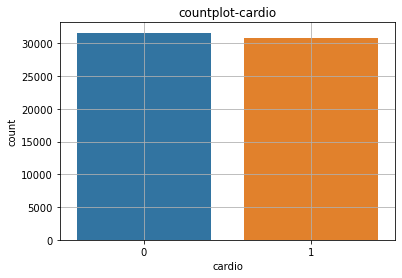

In [38]:
sns.countplot(data['cardio'])
plt.grid()
plt.title('countplot-cardio')

Text(0.5, 1.0, 'gender v/s height')

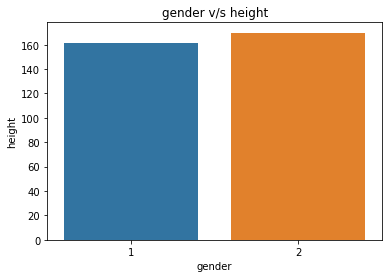

In [39]:
sns.barplot(x=data['gender'],y=data['height'])
plt.title('gender v/s height')

Text(0.5, 1.0, 'gender v/s weight')

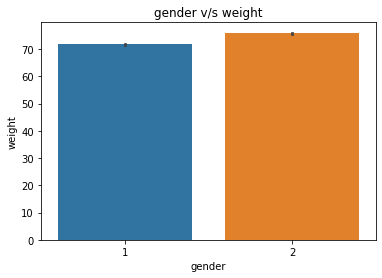

In [40]:
sns.barplot(x=data['gender'],y=data['weight'])
plt.title('gender v/s weight')

In [41]:
a = data[data["gender"]==1]["height"].mean()
b = data[data["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender1)

Gender:1 is female & Gender:2 is male


In [42]:
a = data[data["gender"]==1]["weight"].mean()
b = data[data["gender"]==2]["weight"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender1)

Gender:1 is female & Gender:2 is male


### In our dataset no information is given about which number denotes male and which denote feamle in gender attribute , To find that we have ploted a barplot aginst gender and height and weight. By the assumption men have larger height and weight than female we conclude that number 1 denotes females and 2 denotes male

## 5.2.Distribution plots

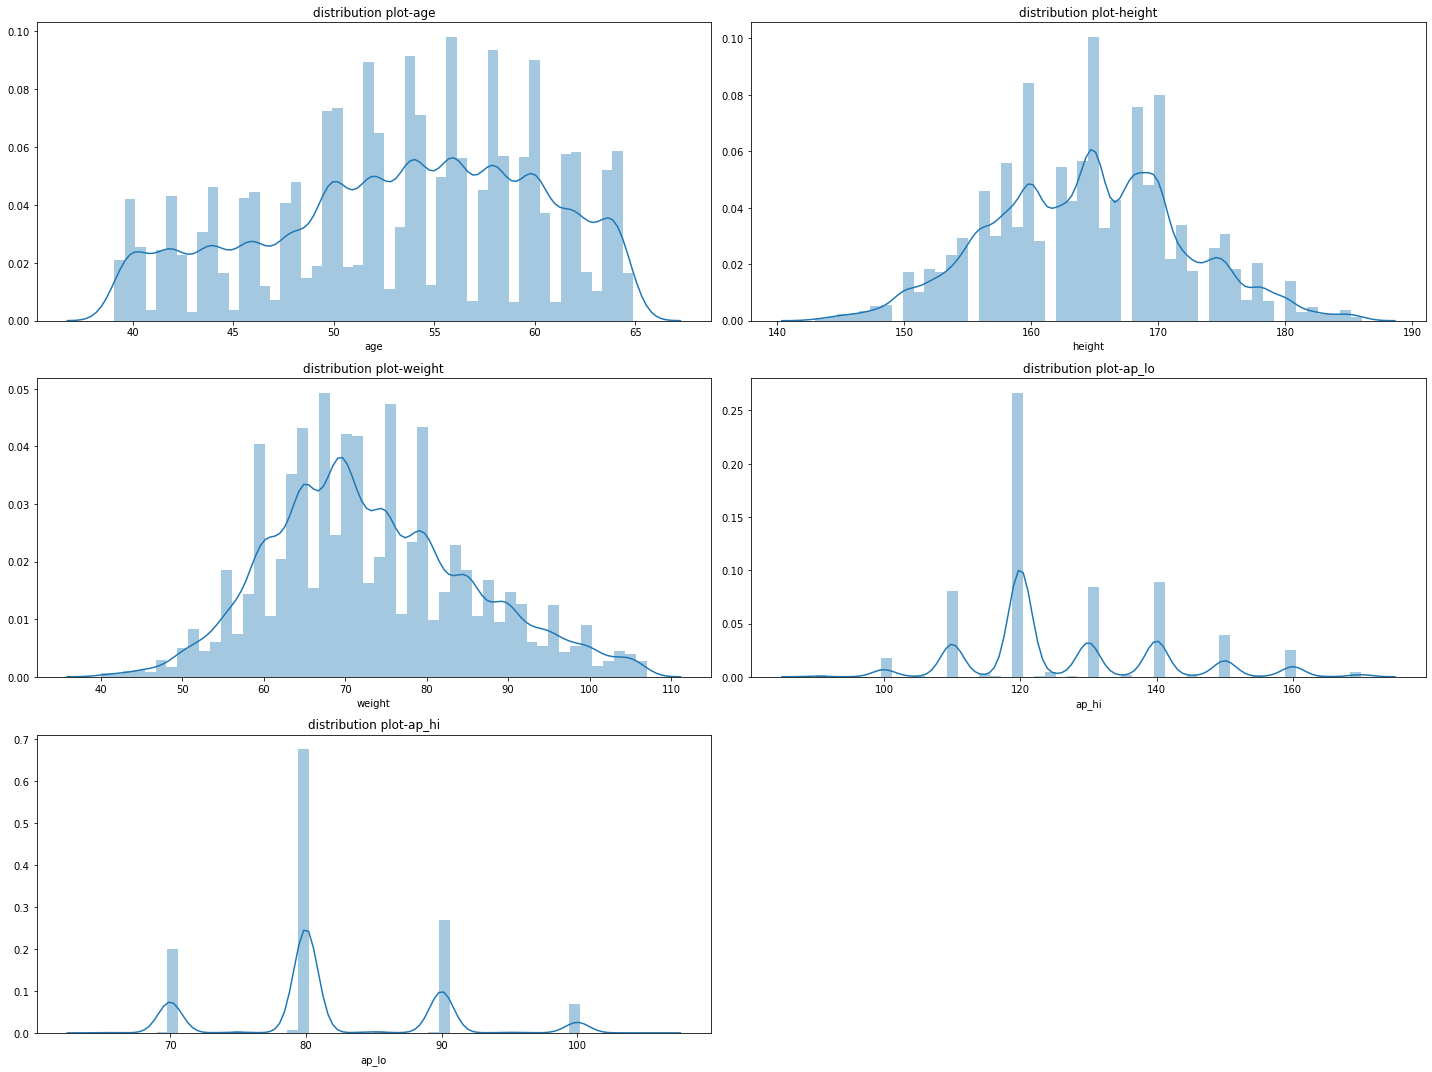

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.distplot(data['age'])
plt.title('distribution plot-age')

plt.subplot(3,2,2)
sns.distplot(data['height'])
plt.title('distribution plot-height')

plt.subplot(3,2,3)
sns.distplot(data['weight'])
plt.title('distribution plot-weight')

plt.subplot(3,2,4)
sns.distplot(data['ap_hi'])
plt.title('distribution plot-ap_lo')
          
plt.subplot(3,2,5)
sns.distplot(data['ap_lo'])
plt.title('distribution plot-ap_hi')
plt.tight_layout()

No handles with labels found to put in legend.


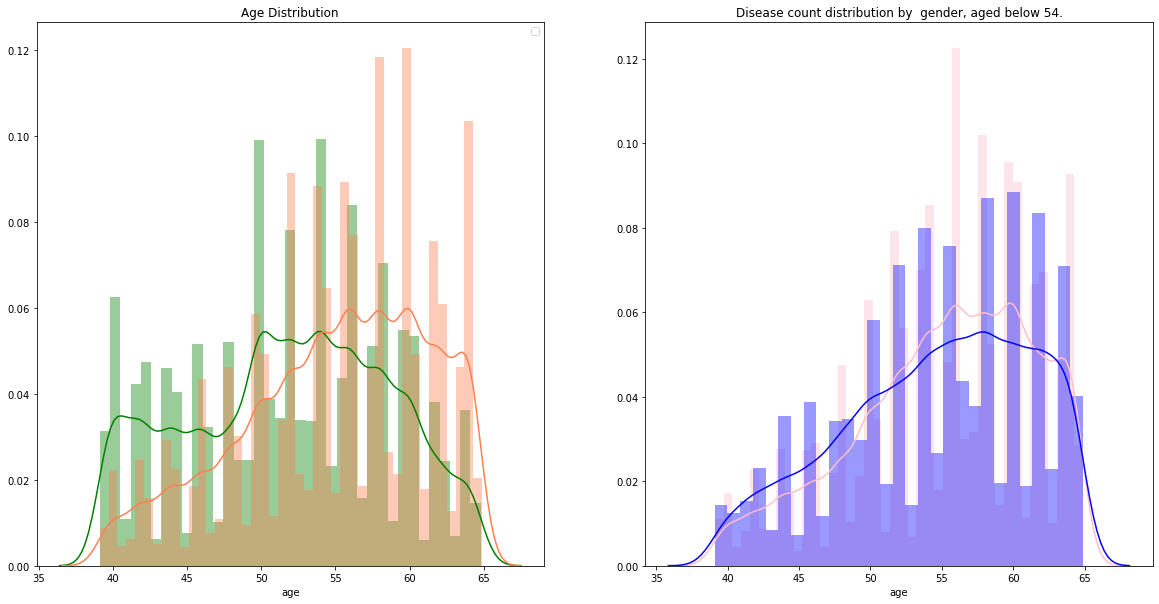

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(data['age'][data['cardio']==0], ax = ax1, color='green')
sns.distplot(data['age'][data['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(data['age'][(data['gender']==1) & (data['cardio']==1)],ax = ax2,color='pink')
sns.distplot(data['age'][(data['gender']==2) & (data['cardio']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

##### People above the age of 54 are more likely to have diseased than below, also males below 50 are more likely to have been diagnosed with heart disease than females which confirms our assumption, even though the difference is not that drastic.

## 5.4.Barplot

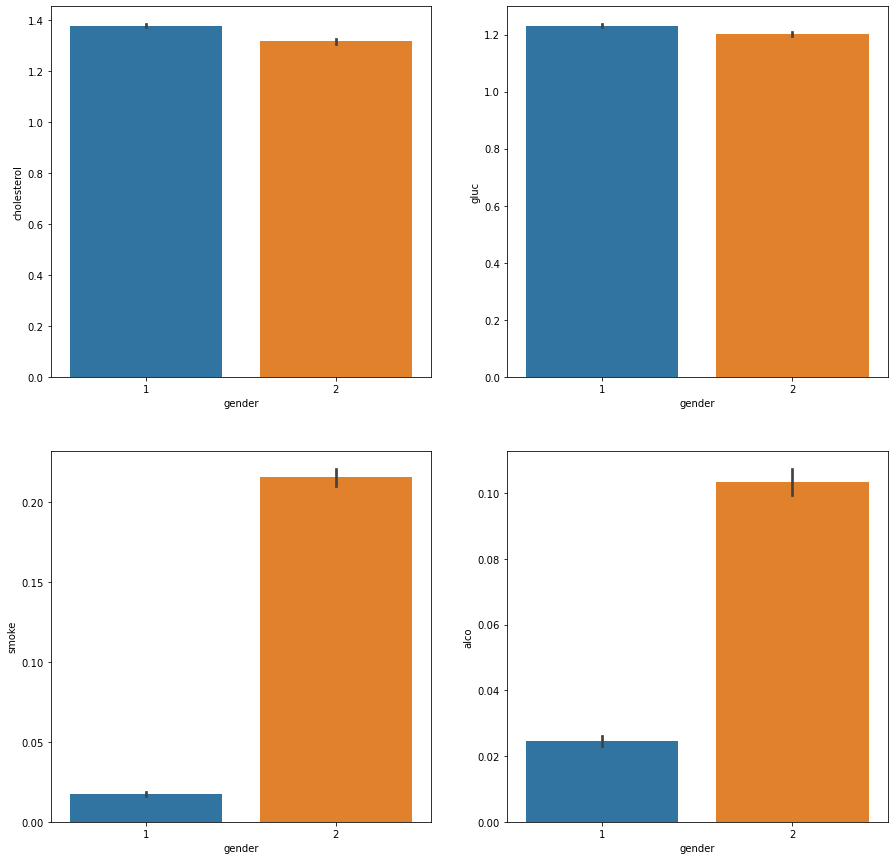

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.barplot(x=data['gender'],y=data['cholesterol'])

plt.subplot(2,2,2)
sns.barplot(x=data['gender'],y=data['gluc'])

plt.subplot(2,2,3)
sns.barplot(x=data['gender'],y=data['smoke'])

plt.subplot(2,2,4)
sns.barplot(x=data['gender'],y=data['alco'])








## 5.5.Heatmap

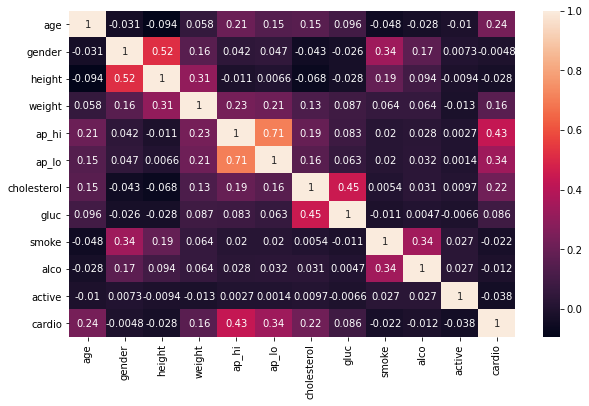

In [46]:
plt.figure(figsize=(10,6))
corr=data.corr()
matrix=sns.heatmap(corr,annot=True)

# 6.Feature engineering

### From height and weight we can create new attribute called BMI (Body Mass Index)

In [47]:
data['bmi']=data['weight']/((data['height']/100)**2)
data.loc[(data['bmi'] < 18.5), 'bmi'] = 1
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] < 25), 'bmi'] = 2
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), 'bmi'] = 3
data.loc[(data['bmi'] >= 30), 'bmi'] = 4

#bmi 1- underweight  2-normal   3-overweight  4-obesity
data.drop(['height','weight'],inplace=True,axis=1)

In [48]:
data['bmi'] = data['bmi'].astype(int) 

In [49]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.4,2,110,80,1,1,0,0,1,0,2
1,55.4,1,140,90,3,1,0,0,1,1,4
2,51.6,1,130,70,3,1,0,0,0,1,2
3,48.2,2,150,100,1,1,0,0,1,1,3
5,60.0,1,120,80,2,2,0,0,0,0,3


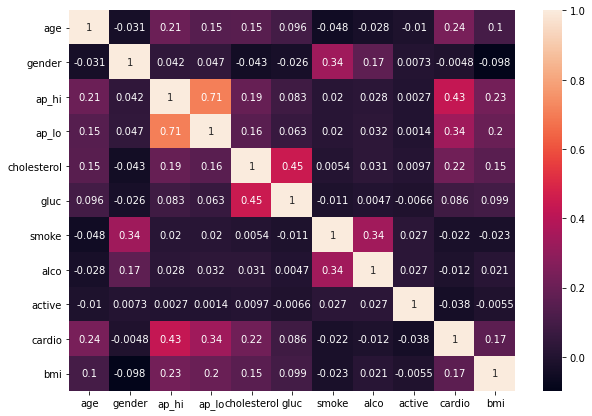

In [50]:
plt.figure(figsize=(10,7))
corr=data.corr()
matrix=sns.heatmap(corr,annot=True)

## keeping target variable to y and all features in X

In [51]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [52]:
X.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50.4,2,110,80,1,1,0,0,1,2
1,55.4,1,140,90,3,1,0,0,1,4
2,51.6,1,130,70,3,1,0,0,0,2
3,48.2,2,150,100,1,1,0,0,1,3
5,60.0,1,120,80,2,2,0,0,0,3


## Applying standard scaling to all numeric features

In [53]:
numeric_features=['age','ap_hi','ap_lo']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[numeric_features]=sc.fit_transform(X[numeric_features])


# 7.Model selection

## Train and test splitting

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(43751, 10)
(18751, 10)


In [55]:
X_train.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
2679,0.004307,1,-0.449293,-0.221435,1,1,0,0,1,2
28353,-0.426600,1,-0.449293,-0.221435,1,1,0,0,1,3
57679,1.014709,1,2.349893,1.081779,2,2,0,1,0,4
52465,-0.188858,1,-0.449293,-0.221435,2,2,0,0,0,2
13055,0.747249,2,-0.449293,-0.221435,1,1,0,0,1,2


In [56]:
X_test.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
21738,1.014709,2,-0.449293,-1.524649,1,1,0,0,0,4
22136,-0.307729,1,-0.799191,-1.003363,2,1,0,0,0,2
46612,-1.704460,1,-1.149090,-1.524649,1,1,0,0,1,3
33844,0.435214,1,0.250504,-0.221435,1,1,0,0,1,1
31594,0.910697,1,-0.449293,-0.221435,1,1,0,0,0,2


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_lr=round(accuracy,2)


In [58]:
target_names=['class 0','class 1']

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.79      0.75      9552
     class 1       0.75      0.66      0.70      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.72      0.72     18751
weighted avg       0.73      0.73      0.72     18751



In [60]:
confusion_matrix(y_test,y_pred)

array([[7538, 2014],
       [3120, 6079]], dtype=int64)

## k-NN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

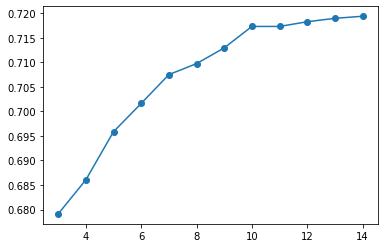

In [62]:
plt.plot(neighbors,acc_val,'o-')

In [63]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_KNN=round(accuracy,2)


In [64]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.78      0.74      9552
     class 1       0.74      0.66      0.70      9199

    accuracy                           0.72     18751
   macro avg       0.72      0.72      0.72     18751
weighted avg       0.72      0.72      0.72     18751



In [65]:
confusion_matrix(y_test,y_pred)

array([[7405, 2147],
       [3115, 6084]], dtype=int64)

## Decision tree 

In [66]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_tree=round(accuracy,2)


In [67]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.73      0.68      9552
     class 1       0.67      0.58      0.62      9199

    accuracy                           0.66     18751
   macro avg       0.66      0.65      0.65     18751
weighted avg       0.66      0.66      0.65     18751



In [68]:
confusion_matrix(y_test,y_pred)

array([[6960, 2592],
       [3855, 5344]], dtype=int64)

## SVM-linear

In [69]:
from sklearn.svm import SVC
svm_class=SVC(kernel='linear')
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_ln=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.82      0.75      9552
     class 1       0.77      0.63      0.69      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.72      0.72     18751
weighted avg       0.73      0.73      0.72     18751



In [70]:
confusion_matrix(y_test,y_pred)

array([[7861, 1691],
       [3441, 5758]], dtype=int64)

## SVM-polynomial

In [71]:
from sklearn.svm import SVC
svm_class=SVC(kernel='poly',degree=3)
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_pl=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.70      0.83      0.76      9552
     class 1       0.78      0.63      0.69      9199

    accuracy                           0.73     18751
   macro avg       0.74      0.73      0.73     18751
weighted avg       0.74      0.73      0.73     18751



In [72]:
confusion_matrix(y_test,y_pred)

array([[7887, 1665],
       [3424, 5775]], dtype=int64)

## SVM-rbf

In [73]:
from sklearn.svm import SVC
svm_class=SVC(kernel='rbf')
svm_class.fit(X_train,y_train)
y_pred=svm_class.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_rbf=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.80      0.75      9552
     class 1       0.76      0.66      0.71      9199

    accuracy                           0.73     18751
   macro avg       0.74      0.73      0.73     18751
weighted avg       0.74      0.73      0.73     18751



In [74]:
confusion_matrix(y_test,y_pred)

array([[7665, 1887],
       [3130, 6069]], dtype=int64)

## Random Forest 

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_features=3,max_depth=5,random_state=2,criterion='entropy')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_rf=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.71      0.80      0.75      9552
     class 1       0.76      0.65      0.70      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.73      0.73     18751
weighted avg       0.73      0.73      0.73     18751



In [76]:
confusion_matrix(y_test,y_pred)

array([[7667, 1885],
       [3206, 5993]], dtype=int64)

## Gradient boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_features=6, max_depth = 5, random_state = 2)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_gb=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.78      0.75      9552
     class 1       0.75      0.69      0.72      9199

    accuracy                           0.74     18751
   macro avg       0.74      0.74      0.74     18751
weighted avg       0.74      0.74      0.74     18751



In [78]:
confusion_matrix(y_test,y_pred)

array([[7442, 2110],
       [2839, 6360]], dtype=int64)

## XGB 

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, max_depth = 3, random_state = 2)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
acc_xgb=round(accuracy,2)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.77      0.74      9552
     class 1       0.74      0.69      0.71      9199

    accuracy                           0.73     18751
   macro avg       0.73      0.73      0.73     18751
weighted avg       0.73      0.73      0.73     18751



In [80]:
confusion_matrix(y_test,y_pred)

array([[7381, 2171],
       [2894, 6305]], dtype=int64)

In [81]:
models = pd.DataFrame({'Model': ['Logistic Regression','K-NN','Decision tree','SVM-linear','SVM-Polynomial',
                                 'SVM-rbf','Random Forest','Gradient boosting','XG Boosting'],
                       'Accuracy':[acc_lr,acc_KNN,acc_tree,acc_ln,acc_pl,acc_rbf,acc_rf,acc_gb,acc_xgb]})
                                 

In [82]:
models.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
7,Gradient boosting,0.74
0,Logistic Regression,0.73
3,SVM-linear,0.73
4,SVM-Polynomial,0.73
5,SVM-rbf,0.73
6,Random Forest,0.73
8,XG Boosting,0.73
1,K-NN,0.72
2,Decision tree,0.66


In [83]:
type(models)

pandas.core.frame.DataFrame

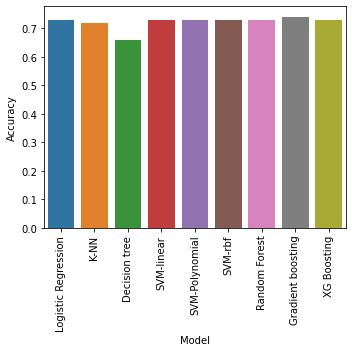

In [84]:

plt.figure(figsize=(5,5))
sns.barplot(x=models['Model'],y=models['Accuracy'])
plt.xticks(rotation=90)
plt.tight_layout()
